### <center>Project 5: KMeans Clustering : UnSupervised Learning</center>  
### <center>All Life Bank : Credit Card Customer Segmentation</center>  
### $Objective:$  <font size="3">*Identify Segments in Existing Customers, based on their Spending Patterns & Past Interactions with the Bank.*</font>  

<u>Key Questions</u>:  
1. How many different segments of customers are there?  
2. How are these segments different from each other?  
3. What are your recommendations to the bank on how to better market to and service these customers?  

### $Conclusion:$ <font size="3">UnSupervised Learning : TARGET or PREDICTED Column / Variable : * Not Applicable *</font>  
<u>Key Answers</u>:  
1. Different Customers Segments: DONE ✓ See last section at the bottom of this file.  
2. Segment Differences from each other: DONE ✓ See last section at the bottom of this file.  
3. Recommendations to Bank for Better Market & Service these Customers: DONE ✓ See last section at the bottom of this file.  


### <center> Data Dictionary</center>  



| No. | Name                          | Meaning             | Data Name    | Short Data Name | Analytic Type | Data Type | Unit Of Measure | Variable Type | Description / Comments |
|----:|:------------------------------|:--------------------|:-------------|:----------------|:--------------|:----------|:----------------|:--------------|:-----------------------|
| 1   | Serial Number                        | Unique Data Record Serial #       | Sl_No       | sn          | Quantitative  | Numeric   | Integer, Ordinal      | Input          | Predictor      |
| 2   | Customer Key            | Unique Customer ID #       | Customer Key         | cstid            | Quantitative  | Numeric   | Integer, Nominal       | Input         | Predictor      |
| 3   | Average Credit Limit                       | Cust: Average Credit Limit       | Avg_Credit_Limit          | crlmt             | Quantitative  | Numeric   | Currency, Cardinal       | Input         | Predictor      |
| 4   | Total Credit Cards              | Cust: Total # of Credit Cards       | Total_Credit_Cards | crcrds          | Quantitative  | Numeric   | Count, Cardinal       | Input         | Predictor      |
| 5   | Total Visits to Bank              | Cust: Total # of Visits to Bank      | Total_visits_bank    | bvisits           | Quantitative  | Numeric   | Count, Cardinal       | Input         | Predictor      |
| 6   | Total Visits Online                | Cust: Total # Of Visits Online       | Total_visits_online      | evisits            | Quantitative  | Numeric   | Count, Cardinal       | Input         | Predictor      |
| 7   | Total Calls Made | Cust: Total # Of Calls Made | Total_calls_made     | calls             | Quantitative  | Numeric   | Count, Cardinal| Input        | Predictor      |  

##### <center><u>Note: UnSupervised Learning : TARGET or PREDICTED or OUTPUT Column / Variable : * Not Applicable *</u><center>  



### <center>Rubric: Scoring Guide: Points By Criteria: Total 60 Points:  

| Pts| Criteria    |                               | Pts| Criteria    |                | Pts| Criteria    |  
|----|-------------|                               |----|-----|                        |----|-------------|  
| 15 | EDA (Check for comments after every step)|  | 15 | Hierarchical Clustering |    | 05 | Clusters Comparison |  
| 10 | Kmeans |                                    | 05 | Silhouette Score |           | 10 | Analysis the Clusters formed |  


### Deliverables: Steps to Follow:  
D1. Univariate Analysis : 10 Marks + 5 Marks (Code Comments, Explanations, Conclusions)  
  * Perform EDA  
  * Create Visualizations to explore data  
  * Understand the variables to get an idea about the Number of Clusters  
  * Comments on the Codes, Explanations on Steps taken. Conclude insights from Graphs  
  
D2. Execute K Means Clustering : 10 Marks  
  * Use Elbow Plot and Analyse Clusters using BoxPlot   

D3. Execute Hierarchical Clustering : 15 Marks  
  * Execute with Different Linkages with the help of Dendrogram and Cophenetic Coefficient  
  * Analyse Clusters formed using BoxPlot  

D4. Calculate Average Silhouette Score for Both Methods : 5 Marks  

D5. Compare K Means Clusters with Hierarchical Clusters : 5 Marks  

D6. Analysis the Clusters formed :  10 Marks
  * Differentiate Clusters from another  
  * Answer all the key questions  
  

### Code Begin : ⬇  
**Load Libraries : ⬇**

In [1]:
# v====== Standard Libraries Begin ======v #

import warnings
warnings.filterwarnings('ignore')

# import pylab as pl  # Mukesh Rao  # Not Needed: np & plt takes care of it. Causes problem in supressing plot info. data outputs 
import seaborn as sns  # Data visualization for statistical graphics  

import numpy as np  # Numerical Python libraries
# random_state = np.random.RandomState(0)  # From Mukesh Rao. MSB: Do we need to do this? Working ok without it.

import matplotlib.pyplot as plt  # Data visualization for Ploting  
import matplotlib.image as mpimg  # To handle plot images, diskfile save, retrieve, render/display 

from matplotlib import cm  # Color Maps  
from mpl_toolkits.mplot3d import Axes3D  # MSB: For 3D plots: 5 USL KMeans Case Study Mr.Tom 
%matplotlib inline  

import pandas_profiling 
import pandas as pd  # to handle data in form of rows and columns
from pandas import ExcelWriter  # Outputs a Excel disk file

from sklearn.svm import SVC  # M.Rao; SVC = Support Vector Classification
from sklearn import metrics, svm  # "svm" = Support Vector Machine > MRao; For Lin/Log Regr, DTree  
from sklearn.impute import SimpleImputer, KNNImputer  
from sklearn.utils import resample, shuffle  # "shuffle"=> Mukesh Rao; Bagging Sample data set creation  
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut, GridSearchCV, RandomizedSearchCV  # Lin/LogR, DTree  
from sklearn.pipeline import Pipeline, make_pipeline  # M.Rao
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor  # MRao, Tom 
from sklearn.cluster import KMeans, AgglomerativeClustering  # For 5 UL KMeans, Hierarchial 

# For Linear Dimensionality (Cols/Attributes) Reduction to a Lower dimensional space (eg: reduce 15 cols to 2 cols): 
from sklearn.decomposition import PCA  # 5 UL : "Principal Component Analysis" for "Singular Value Decomposition" (SVD) 

# ClusterCentroids=Cluster based UNDERsampling, TomekLinks=Under sampling by Deleting nearest majority neighbor/similar rows 
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks 
from imblearn.over_sampling import SMOTE  # Over sampler 
from imblearn.combine import SMOTETomek  # OVER / UP Sampling followed by UNDER / DOWN Sampling

from mlxtend.feature_selection import SequentialFeatureSelector as sfs  # For Features selection  
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs  # For Plotting  

# ====== For Linear Regression ======

from scipy.stats import zscore, pearsonr, randint as sp_randint  # For LinReg 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster  # For 5UL Hierarchial  
from scipy.spatial.distance import cdist, pdist  # pdist = pairwise distr btwn datapoints : for 5UL K.Means, Hierarchial 

from category_encoders import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, binarize, LabelEncoder, OneHotEncoder # M.Rao
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score  # LinRegr, USL: HierA Cluster

import statsmodels.api as sm  # For OLS Summary in Linear Regression  
import statsmodels.formula.api as smf  # For OLS Summary in Linear Regression  

from yellowbrick.regressor import ResidualsPlot 
from yellowbrick.classifier import ClassificationReport, ROCAUC 

# ====== For Logistic Regression ======
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, \
                            f1_score, roc_curve, roc_auc_score, classification_report, auc # Mukesh Rao  

# ====== For Decision Tree ======
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
# from sklearn.externals.six import StringIO  # MSB: Discontinued in Scikit Version 0.23 (available only upto ver 0.22)
import pydotplus as pdot  # to display decision tree inline within the notebook
import graphviz as gviz

# DTree does not take strings as… # … input for the model fit step....
from sklearn.feature_extraction.text import CountVectorizer 

# ======= For Ensemble Techniques =======
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, \
                             BaggingRegressor,  RandomForestRegressor,  AdaBoostRegressor,  GradientBoostingRegressor 

# ======= Utilities ======= 
import os, datetime, time, pickle  # For model export
from os import system  # For system commands from within python (eg "ls -l")

# ======= Set default style ========

# Multiple output displays per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Image, Markdown
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>")) # Increase cell width

# ===== Options =====

pd.options.display.float_format = '{:,.2f}'.format  # Remove scientific notations to display numbers with 2 decimals
pd.set_option('display.max_columns', 100)  # Max df cols to display set to 100.
pd.set_option('display.max_rows', 50)  # Max df rows to display set to 50.
# pd.set_option('display.max_rows', tdf.shape[0]+1)  # just one row more than the total rows in df

# Update default style and size of charts
# plt.figure(figsize=(12,8))
plt.style.use('ggplot')  # plt.style.use('classic') ?? 
plt.rcParams['figure.figsize'] = [10, 8]

sns.set_style(style='darkgrid')

# ====== Standard Libraries End ======^ #


**Function Definition :** ⬇  

##### * Function describeX(): ⬇  

In [2]:
# BEGIN: Function describeX(): Manoj S Bhave: My Original Code Work. Package & Publish on PyPi Python Package Index / Python Library, etc... 

# Future: Add Params: Dup.Rows = 'y/n', Dup.Cols = 'y/n' (for speed), #Modes to Display = n (0,1,2,3..n), ... 
# ... ColType = 'all/num/obj' (All / Numeric / Object), Display Sample Row = True/False, etc... 

# Pending: Code Comments...

def describeX(df, dcols = False, srows='', outl='iqr'):

    """ 

Input   : dataframe, parameters 
Output  : 1. dataframe via display() 2. strings via print() 
Usage   : describeX(dataframe) 
Author  : Manoj S Bhave 
Version : 0.1 Good To Go!

Function "describeX()" entends the output of the regular pd.df.describe() features with various other basic df stats features \
in a single output for convenience:

Inputs: dataframe (df)
Params: 
1. dcols = False (default). If True, detects Duplicate COLUMNS in df. Can be SLOW for large df: If df.size > 1M, then: NOT Computed!

2. srows = '' (default). When specified, calls function showdfQ() to display df rows with various row selection criteria. 

3. outl = 'iqr' (default). When specified, calls function showOutL() to show Outliers in all columns. 

NOTE: More param info, Shift+Tab on functions: showdfQ(), showOutL() 

Outputs: Extended Descriptive Statistics in a Unified Compact Tabular Snapshot for all Numeric and/or Object type df columns as \
applicable. These extended / aditional Features are as follows: 

* "unq"   : Unique values count * "null" : Null values count 
* "zero"  : Zero values count   * "skew" : Skewness of column data distribution 
* "OutL"  : Number of Outliers Lower/Less  than Q1-IOR*1.5 of column 
* "OutH"  : Number of Outliers HIgher/Less than Q3+IOR*1.5 of column 
* "mode"  : Mode value of col, displayed when UniMode ONLY
* "mode1" : 1st Mode value of col, displayed when MultiMode ONLY
* "mode2" : 2nd Mode value of col, displayed when MultiMode ONLY
* "modeN" : Total NUMBER of modes for the col, displayed when MultiMode ONLY

NOTE: Limited Output: Mode: When MultiMode, displays ONLY first TWO Modes for Simplicity. Indicates existance of multiple modes for a column. 

Dataframe Level Overall Features: Displayed at the bottom of above Stats Table: 

* "Rows"     : Number of Rows   in df * "Cols"     : Number of Columns in df 
* "DUP.Rows" : Duplicate Rows   in df * "DUP.Cols" : df.size>1M=NOT Computed!
* "Elements" : Number of values in df (rows x cols) 
* "Outliers" : Method to detect outliers' count in "OutL", "OutH" cols. 

    """
    
    dfs = pd.DataFrame()
    dfs['cols'] = df.columns
    dfs = dfs.set_index(keys=['cols'])
    dfs['dtype'] = df.dtypes

    dfs = dfs.join(df.describe(include='all').T)
    drop_cols = ['count']
    if 'unique' in dfs.columns:
        drop_cols = ['count', 'unique']
    dfs.drop(drop_cols, axis=1, inplace=True)

    dfs['unq'] = df.nunique()
    dfs['null'] = df.isna().sum()
    dfs['zero'] = (df == 0).sum()
    dfs['<0'] = (df.select_dtypes(include='number') < 0).sum()
    dfs['skew'] = df.skew()

    # Final: Outliers: Works OK!

    outlrs = []
    for col in df.select_dtypes(include='number'):
        q1 = round(df[col].quantile(.25),2)
        q3 = round(df[col].quantile(.75),2)
        otr = round((q3-q1)*1.5, 2)
        otl = round(q1 - otr, 2)
        oth = round(q3 + otr, 2)
        otls = (df[col] < otl).sum()
        oths = (df[col] > oth).sum()
        outlrs.append((col, otls, oths))

    outlrs_df = pd.DataFrame(outlrs)
    outlrs_df = outlrs_df.set_index(keys=[0])
    dfs['OutL'] = outlrs_df[1]
    dfs['OutH'] = outlrs_df[2]

    # Final: Mode: It Works OK!
    tmp_df = df.mode().T
    if len(tmp_df.columns) > 1:
        dfs['mode1'] = tmp_df[0]
        dfs['mode2'] = tmp_df[1]
        dfs['modeN'] = tmp_df.T.count()
    else:
        dfs['mode'] = tmp_df[0]

    print('* DF Stats For All Columns:')
    dfs.reset_index(inplace=True)
    display(dfs)

    dupcols = 'dcols=False'
    if dcols: 
        if df.size < 1000000:
            dupcols = df.T.duplicated().sum()
        else:
            dupcols = 'n/a:df.size>1M'

    print('* Rows:', df.shape[0], ' * Cols:', df.shape[1], ' * Elements:', df.size, 
      ' * DUP.Rows:', df.duplicated().sum(), ' * DUP.Cols:', dupcols, 
      ' * Outliers: OutL < Q1-IORx1.5, OutH > Q3+IORx1.5') #' * Type:', type(df)

    if srows != '': showdfQ(df, srows)

# End: Function describeX(). 


##### * Function showOutL(): ⬇  

In [3]:
# BEGIN: Function showOutL(): Manoj S Bhave: My Original Code Work. Package & Publish on PyPi Python Package Index / Python Library, etc... 

# Future: Add Params: Activate 'zscore', Outlier_Update_Method = zscore < 0.3, iqr, inside_whisker_end, Q1/Q3 mean, median, mode, KNN, 

def showOutL(df, mthd='iqr', impute=False):

    """ 

Input   : dataframe, parameters 
Output  : Lists Column wise Outliers via print() 
Usage   : showOutL(dataframe, params) 

Author  : Manoj S Bhave 
Created : Tue.Jul.21 2020 
Version : 0.1 (Good To Go!)

Function "showOutL" Detects and Displays all Outliers, based on IQR Method, for all Numeric columns. For each column it displays \
Total Outlier count (Low + High), Separate Low & High counts, Low & High Whisker values, Q1 & Q3 values as potential Imputing values.

Inputs: dataframe (df) 
Params: 
1. 'mthd' = 'iqr (default): Method to be used for Outlier Detection. Other Method value: 'zscore' (Not yet Implemented)

2. 'impute' = False (default): Outliers Display only (No Update). When True, it updates the Outlier value with applicable Q1 / Q3 values \
for each Column, for all Rows. Then to check & verify Imputations, it reruns itself in 'impute' = False mode to Update & Display \
the New metrics based on New Imputed values for verification. 

IQR Method Used: LOW Whisker End = Q1 - (IQR * 1.5); HIGH Whisker End = Q3 + (IQR *1.5) are calculated for a Column. Column values \
that are Below (Less Than) the Low End and/or Col values that are Above (Greater Than) the High End and identified as "Outliers" for \
"Display Only" for "Update" based on param value 'Impute' = False/True.

NOTE: Limitation: Outlier values are update with Q1 and Q3 values only. Other values can be used like 'Mean', 'Median', 'Mode', etc. 

Outputs: 
1. When 'impute' = False: Lists all Outliers for each Numeric Col as mentioned above with Total (Low + High) Outliers counts along \
with individual Low & High subcounts. Displays Low & High cut off Whisker end values along with Q1 & Q3 values for each Col resp.

2. When 'impute' = True: Lists the completion status collectively & individually for each Col along with Total values Imputed for \
each Col. After completion, this function ReRuns itself (without Further Imputation) to ReDetect any New Outliers to check, verify, \
update the new Metrics due to the newly updated Outlier values.

NOTE: If New Outliers are noticed, then if needed, this process can be Rerun in 'impute' = True to fix these new outliers. Process can \
be repeated till it makes business sense to live with some marginal outliers or not without compromising too much on information loss \
due to 'fixed' Col values as a result of Outlier Elimination process. 

    """

# Detect & Display All Outliers for All Numeric Cols with IQR Method and Impute with respective columns' Q1 or Q3 values as applicable: 

    print('\n* Outliers Detection: IQR Method: For All Numerical Columns: LOW Whisker = Q1 - (IQR * 1.5); HIGH Whisker = Q3 + (IQR *1.5): \n')

    for col in df.select_dtypes(include='number'):

        q1  = round(df[col].quantile(.25),2)
        q3  = round(df[col].quantile(.75),2)

        otr = round((q3 - q1) * 1.5, 2)
        otl = round(q1 - otr,2)
        oth = round(q3 + otr,2)

        otls = (df[col] < otl).sum()
        oths = (df[col] > oth).sum()

        if impute:
            df[col] = np.where((df[col] < otl), q1, df[col])
            df[col] = np.where((df[col] > oth), q3, df[col])
            print('Col:', col, otls+oths, 'Values Imputed') 
            
        elif (otls + oths) != 0:
            print('\n* Column:', col, ': Total', otls+oths, 'Outlier Values:') 
            
            if otls != 0:
                print(' ', str(otls).rjust(3, ' '), 'outliers Under Low  Whisker =', str(otl).rjust(7, ' '), ': Impute with Q1 value:', q1) 
            if oths != 0:
                print(' ', str(oths).rjust(3, ' '), 'outliers Over  High Whisker =', str(oth).rjust(7, ' '), ': Impute with Q3 value:', q3) 

        else: print('\n* Column:', col, ': Total', otls+oths, 'Outlier Values: NO OUTLIERS!') 
            
    if impute:  # ReRun to get new matrix after Outlier fix to display the New Outlier count:
        print(*'\nImpute Complete by IQR Method: Check to verify Outliers Elimination')
        showOutL(df, impute=False)
    
# End: Function showOutL(). 


##### * Function showdfQ(): ⬇  

In [4]:
# BEGIN: Function showdfQ(): Manoj S Bhave: My Original Code Work. Package & Publish on PyPi Python Package Index / Python Library, etc... 

# Future: Add Params: ???

def showdfQ(df, srows='m5'):

    """ 

Input   : dataframe, parameters 
Output  : dataframe rows via display() 
Usage   : showdfQ(dataframe, params) 

Author  : Manoj S Bhave 
Created : Tue.Jul.21 2020 
Version : 0.1 (OK To Go!)

Function "showdfQ()" displays a section of dataframe (df) rows as selected by the given params in a single convenient output. Most \
Important functionality is its ability to show rows from around the Middle of df and Middle of Q1 and Q2 which not available easily \
in packaged form of a Function() or an df.attribute()

Inputs: dataframe (df) 
Params: srows = 'hmtrqQ9' : Optional. Default = 'm5': Middle 5 rows shown 

Each letter in the 'srows' param string is a separate parameter (max seven) and can be specified in any combination thereof. \
It takes only the First Seven characters of the param string, rest all chars are ignored. Also, it considers only ONE Digit that \
that occurs First in the param string, rest all digits are ignored: 

'h' : df rows from Head = df.head() 
't' : df rows from Tail = df.tail() 
'r' : df rows Random = df.sample() 
'm' : df rows from around Middle of df 
'q' : df rows from around middle of Q1 
'Q' : df rows from around middle of Q3 
0..9: df rows to display (1..9) per specified criteria above. Optional. Default = '0'. Display 10 rows (Max) when '0' 

NOTE: Limitations: 
A. Minimum row count in the input df MUST be at least 20, otherwise when len(df) < 20 this function will not produce any output. No Show! 
B. When srows is '' or does NOT contain any of the VALID chars above, then this function does not produce any output. No Show! 

Outputs: Data rows from the specified dataframe (df) are displayed as per the specified params above. If all or multiple criteria \
(letters in params) are specified then the order of dataset display is as follows: (whichever is applicable based on params):

1. 'h' Head (0 thru n)
2. 'q' Q1
3. 'm' Middle
4. 'Q' Q3
5. 't' Tail
6. 'r' Random

NOTE: Limitation: The Output is limitd to Max 10 (Ten) rows in any case / combinations of chars within the 'srows' params string. 

    """

    if len(df) < 20: srows = ''

    if len(srows) > 7: srows = srows[0:7]
    srows

    nrows = 10
    for i in srows:
        if i.isdigit():
            nrows = int(i)
            break

    if nrows < 1 or nrows > len(df) : nrows = 10
    nrows, df.shape[0]

    mid = len(df)//2 
    low = mid-nrows//2
    high = mid+1+nrows//2

    qmid = len(df)//4 
    qlow = qmid-nrows//2
    qhigh = qmid+1+nrows//2

    Qmid = mid + qmid
    Qlow = Qmid-nrows//2
    Qhigh = Qmid+1+nrows//2

    print('')
    if 'h' in srows: display('Showing Head '      + str(nrows) + ' Rows:', df.head(nrows))
    if 'q' in srows: display('Showing Q1 Middle ' + str(nrows) + ' Rows:', df.iloc[qlow : qhigh])
    if 'm' in srows: display('Showing Middle '    + str(nrows) + ' Rows:', df.iloc[low : high])
    if 'Q' in srows: display('Showing Q3 Middle ' + str(nrows) + ' Rows:', df.iloc[Qlow : Qhigh])
    if 't' in srows: display('Showing Tail '      + str(nrows) + ' Rows:', df.tail(nrows))
    if 'r' in srows: display('Showing Random '    + str(nrows) + ' Rows:', df.sample(nrows))

# End: Function showdfQ(). 


In [5]:
# Read & Load the input Datafile into Dataset frame: Customer DataFrame: 
cdf = pd.read_excel('ALL Life Bank Credit Card Customer Data.xlsx')
cdf

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2                    1                    3                 4  
3                    1                    1                 4  
4                    0                   12                 3  
..                 ...                  ...               ...  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2  

[660 rows x 7 columns]

**My Housekeeping: Incremental DATA Backup 0: ⬇**  

In [6]:
# My Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 0")

cdf0 = cdf.copy()  # Original Df
cdf.to_csv('cdf0.csv')  # Also export as .csv file to disk

# Verify backup copy
! ls -l cdf*
cdf0.shape, type(cdf0)
cdf0.sample(7)

### Incremental DF Data Backup 0

-rw-r--r--  1 RiddhiSiddhi  staff  18353 Jul 29 08:18 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18287 Jul 28 18:36 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  11786 Jul 28 18:39 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18314 Jul 28 18:41 cdf3.csv
-rw-r--r--  1 RiddhiSiddhi  staff  66968 Jul 28 18:44 cdf4.csv


((660, 7), pandas.core.frame.DataFrame)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
572    573         59074             71000                   7   
324    325         49844              9000                   4   
307    308         16374              8000                   5   
384    385         23409              8000                   4   
170    171         98602              7000                   2   
599    600         72339             57000                   6   
361    362         89635             18000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  
572                  4                    0                 2  
324                  5                    0                 4  
307                  3                    2                 1  
384                  4                    0                 0  
170                  1                    2                 8  
599                  2                    2                 0  
361                  3                    1                 4

In [7]:
# Rename column names for convenience and/or meaningfulness:  
cdf.head(1)
cdf.rename(columns={ 'Sl_No' : 'sn' , 'Customer Key' : 'cstid' , 'Avg_Credit_Limit' : 'crlmt' , 'Total_Credit_Cards' : 'crcrds' , 
                    'Total_visits_bank' : 'bvisits' , 'Total_visits_online' : 'evisits' , 'Total_calls_made' : 'calls' }, 
           inplace=True, errors='raise')
cdf.head(1)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0

sn  cstid   crlmt  crcrds  bvisits  evisits  calls
0   1  87073  100000       2        1        1      0

**My Housekeeping: Incremental DATA Backup 1: ⬇**  

In [8]:
# My Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 1")

cdf1 = cdf.copy()  # DF Modified: Changed col names
cdf.to_csv('cdf1.csv')  # Also export as .csv file to disk

# Verify backup copy
! ls -l cdf*
cdf1.shape, type(cdf1)
cdf1.sample(7)

### Incremental DF Data Backup 1

-rw-r--r--  1 RiddhiSiddhi  staff  18353 Jul 29 08:18 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18287 Jul 29 08:18 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  11786 Jul 28 18:39 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18314 Jul 28 18:41 cdf3.csv
-rw-r--r--  1 RiddhiSiddhi  staff  66968 Jul 28 18:44 cdf4.csv


((660, 7), pandas.core.frame.DataFrame)

sn  cstid  crlmt  crcrds  bvisits  evisits  calls
269  270  55382  16000       5        5        1      2
440  441  48667  50000       5        3        0      3
527  528  57451  37000       5        2        1      3
580  581  90586  52000       4        5        2      1
260  261  89328  15000       4        5        1      0
554  555  97850  33000       5        2        2      0
656  657  60732  84000      10        1       13      2

**My Housekeeping: Incremental CODE Backup 1: ⬇**  

In [110]:
### My Housekeeping: Incremental Jupyter Code File Backup 1 as of now ^^^
Markdown("### Incremental Jupyter Notebook Code Backup 1")

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 1.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code Backup 1

-rw-r--r--  1 RiddhiSiddhi  staff  47535 Jul 18 07:08 Project 5 USL KMeans All Life Bank Backup1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  47535 Jul 18 07:07 Project 5 USL KMeans All Life Bank.ipynb


### D1. Univariate Analysis : Starts Here: ⬇  

* Perform EDA.  
* Create Visualizations to explore data.  
* Understand the variables to get an idea about the Number of Clusters.  
* Comments on the Codes, Explanations on Steps taken.  
* Conclude insights from Graphs.  


In [14]:
profile = pandas_profiling.ProfileReport(cdf) 
profile 

Actions From the Above Profile Report:  
* DROP Column 'sn' (Serial#): Unique Sequential Data Rec # which does not add value to the Analysis.  
* DROP Column 'cstid' (Customer ID)?: Unique Customer ID # which does not add value to the Analysis. But it maybe needed later to identify Customer(s) in Cluster(s).

Observations From the Above Profile Report:  
* Total Rows 660. But Unique 'cstid' are 655. It means there are 5 DUPLICATE entries for following 'cstid'. But the other column values for these duplicate 'cstid' entries are different. So ideally these rows should be combined grouped by 'cstid' and the relevant numeric column values should be Averaged ("mean"). But since there are only 5 such records (0.75%) we will leave them as they are. 

In [9]:
# As Observed & Determined above: Showing 10 rows below, with 5 Duplicate Pairs of 'cstid' values: Partial Duplicate Row Kept as they are: 
# These 'custid' (Customers) have multiple entries (records/observations): 
# BUT with different attribute/col values for: 'crlmt', 'crcrds', 'bvisits', 'evisits', 'calls' 
# AS determined above, these are "partial" duplicates rows and NOT TRUE 'full' duplicates, so we will NOT 'combine' NOR DROP them.

cdf[(cdf['cstid'].duplicated(keep=False))].sort_values(by=['cstid'])

sn  cstid   crlmt  crcrds  bvisits  evisits  calls
48    49  37252    6000       4        0        2      8
432  433  37252   59000       6        2        1      2
4      5  47437  100000       6        0       12      3
332  333  47437   17000       7        3        1      0
411  412  50706   44000       4        5        0      2
541  542  50706   60000       7        5        2      2
391  392  96929   13000       4        5        0      0
398  399  96929   67000       6        2        2      2
104  105  97935   17000       2        1        2     10
632  633  97935  187000       7        1        7      0

In [10]:
# Action Item(s) as Determined above: DROP column 'sn' (Serial Number), 'cstid' (Customer ID): 

cdf.drop(['sn', 'cstid'], axis = 1, inplace = True) 
cdf.head() 

crlmt  crcrds  bvisits  evisits  calls
0  100000       2        1        1      0
1   50000       3        0       10      9
2   50000       7        1        3      4
3   30000       5        1        1      4
4  100000       6        0       12      3

**My Housekeeping: Incremental DATA Backup 2: ⬇**  

In [11]:
# My Housekeeping: Incremental DF Data Backup as of now: 
Markdown("### Incremental DF Data Backup 2") 

cdf2 = cdf.copy()  # DF Modified: DROPPED cols 'sn', 'cstid' 
cdf.to_csv('cdf2.csv')  # Also export as .csv file to disk 

# Verify backup copy 
! ls -l cdf* 
cdf2.shape, type(cdf2) 
cdf2.sample(7) 

### Incremental DF Data Backup 2

-rw-r--r--  1 RiddhiSiddhi  staff  18353 Jul 29 08:18 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18287 Jul 29 08:18 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  11786 Jul 29 08:19 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18314 Jul 28 18:41 cdf3.csv
-rw-r--r--  1 RiddhiSiddhi  staff  66968 Jul 28 18:44 cdf4.csv


((660, 5), pandas.core.frame.DataFrame)

crlmt  crcrds  bvisits  evisits  calls
377  19000       5        2        0      4
596  42000       6        4        2      0
487  39000       7        5        2      1
87    5000       4        1        2      5
374  18000       6        5        0      4
513  40000       5        3        1      4
119   9000       3        0        4      9

In [12]:
# Custom Function "describeX" is an extension of regular df.describe(). It includes these additional features for all df columns: 
 
# * "unq"   = Unique values count * "null" = Null values count * "zero" = Zero values count * "skew" = Skewness of col data distribution. 
# * "mode1" = Mode value of col.  * "mode2" = 2nd Mode value of col, if it exists (Max). * "modeN" = Total NUMBER of modes for col. 
# * "OutL"  = Number of Outliers Lower/Less than Q1-IOR*1.5 of col. * "OutH" = Number of Outliers Higher/Less than Q3+IOR*1.5 of col. 
# 
# * "Rows"     : Number of Rows   in df * "Cols"     : Number of Columns in df 
# * "DUP.Rows" : Duplicate Rows   in df * "DUP.Cols" : Duplicate Columns in df 
# * "Elements" : Number of values in df (rows x cols) 
# * "Outliers" : Note on "OutL", "OutH" cols in above Stats Table 

# Function definition is at the top, after libraries. Written by self (Manoj S Bhave) and to be published on PyPi, Python Libs, etc...
# For more details use Shift+Tab on this function below: 

describeX(cdf, dcols=True, srows='m0')

* DF Stats For All Columns:


cols  dtype      mean       std      min       25%       50%       75%  \
0    crlmt  int64 34,574.24 37,625.49 3,000.00 10,000.00 18,000.00 48,000.00   
1   crcrds  int64      4.71      2.17     1.00      3.00      5.00      6.00   
2  bvisits  int64      2.40      1.63     0.00      1.00      2.00      4.00   
3  evisits  int64      2.61      2.94     0.00      1.00      2.00      4.00   
4    calls  int64      3.58      2.87     0.00      1.00      3.00      5.00   

         max  unq  null  zero  <0  skew  OutL  OutH  mode  
0 200,000.00  110     0     0   0  2.20     0    39  8000  
1      10.00   10     0     0   0  0.14     0     0     4  
2       5.00    6     0   100   0  0.14     0     0     2  
3      15.00   16     0   144   0  2.23     0    37     2  
4      10.00   11     0    97   0  0.66     0     0     4

* Rows: 660  * Cols: 5  * Elements: 3300  * DUP.Rows: 11  * DUP.Cols: 0  * Outliers: OutL < Q1-IORx1.5, OutH > Q3+IORx1.5



'Showing Middle 10 Rows:'

crlmt  crcrds  bvisits  evisits  calls
325  14000       4        4        2      3
326   6000       4        4        2      3
327  11000       5        5        1      1
328  14000       4        4        2      1
329   5000       7        4        2      4
330  19000       6        3        1      2
331  18000       6        5        2      0
332  17000       7        3        1      0
333  15000       5        4        2      2
334   8000       7        4        2      0
335  19000       6        5        2      0

**My Housekeeping: Incremental CODE Backup 2: ⬇**  

In [363]:
### My Housekeeping: Incremental Jupyter File Code Backup 2 ⬆
Markdown("### Incremental Jupyter Notebook Code Backup 2 ⬆")

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 2.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code Backup 2 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMeans All Life Bank Backup 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMeans All Life Bank Backup 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036091 Jul 20 04:13 Project 5 USL KMeans All Life Bank Backup2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMeans All Life Bank.ipynb


Observations from the df stats above:
* Zeros values: 'bvisits', 'evisits', 'call': Low to Modr: Counts OK, valid zeroes. Custs may never had done this activity. ACTION: None  
* Outliers: High: 'crlmt' = 39, 'evisits' = 37: Two outliers on the Higher side of the IQR Wisker. ACTION: Impute  
* Skewness: High: 'crlmt', 'evisits'; Moderate: 'calls'; Very Low: Rest 3 columns. See Skewness Guide below: ACTION: Scale  
* No Null values. No Negative (-ve) values. No Outliers on the Lower side of the IQR Wisker. No multiple modes, except 'cstid' (OK)  
* Rest all values appear to be OK  

##### <center>Skewness Guide (Arbitrary): If distribution skew() is between these ranges then the degree of Skewness is :</center>  
| Degree   |    Lower    |    Upper    | Type       | Comments                 |
|----------|:-----------:|:-----------:|------------|--------------------------|
| High     |     < −1    |     > +1    | Asymmetric | Outside of Lower & Upper |
| Moderate | −1.0 & −0.5 | +0.5 & +1.0 | Asymmetric | Within Lower OR Upper    |
| Low      |     −0.5    |     +0.5    | Asymmetric | Within Lower AND Upper   |
| Very Low |    −0.25    |    +0.25    | Symmetric  | Within Lower AND Upper   |
| No Skew  |    0.0 or   |  near +0.0- | Symmetric  | Almost zero (+ or -)     |

ACTION Items From The Above Observations: Impute Outliers: 'crlmt', 'evisits' which are beyond upper/higher wisker: List their values:


* Outliers Detection: IQR Method: For All Numerical Columns: LOW Whisker = Q1 - (IQR * 1.5); HIGH Whisker = Q3 + (IQR *1.5): 


* Column: crlmt : Total 39 Outlier Values:
   39 outliers Over  High Whisker = 105000.0 : Impute with Q3 value: 48000.0

* Column: crcrds : Total 0 Outlier Values: NO OUTLIERS!

* Column: bvisits : Total 0 Outlier Values: NO OUTLIERS!

* Column: evisits : Total 37 Outlier Values:
   37 outliers Over  High Whisker =     8.5 : Impute with Q3 value: 4.0

* Column: calls : Total 0 Outlier Values: NO OUTLIERS!


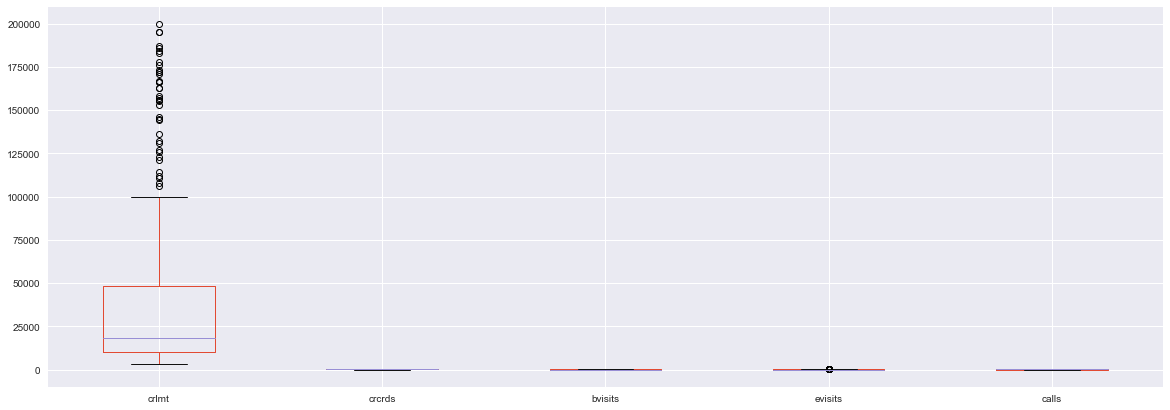

In [13]:
# Display & Impute Outliers for cols 'crlmt', 'evisits' as determined in ACTION item(s) above: 
# Custom Function showOutL() Detects, Display and/or Imputes Outliers by IQR method. 
# Function definition is at the top, after libraries. Written by self (Manoj S Bhave) and to be published on PyPi, Python Libs, etc...
# For more details use Shift+Tab on this function below: 

# Now Use the Custom Function showOutL() in "Display Only" mode (NO Impute): 
showOutL(cdf)  # list Outliers 

p = plt.figure(figsize=(20,7))
g = cdf.boxplot()  # Visualize Outliers 



* Outliers Detection: IQR Method: For All Numerical Columns: LOW Whisker = Q1 - (IQR * 1.5); HIGH Whisker = Q3 + (IQR *1.5): 

Col: crlmt 39 Values Imputed
Col: crcrds 0 Values Imputed
Col: bvisits 0 Values Imputed
Col: evisits 37 Values Imputed
Col: calls 0 Values Imputed

 I m p u t e   C o m p l e t e   b y   I Q R   M e t h o d :   C h e c k   t o   v e r i f y   O u t l i e r s   E l i m i n a t i o n

* Outliers Detection: IQR Method: For All Numerical Columns: LOW Whisker = Q1 - (IQR * 1.5); HIGH Whisker = Q3 + (IQR *1.5): 


* Column: crlmt : Total 0 Outlier Values: NO OUTLIERS!

* Column: crcrds : Total 0 Outlier Values: NO OUTLIERS!

* Column: bvisits : Total 0 Outlier Values: NO OUTLIERS!

* Column: evisits : Total 0 Outlier Values: NO OUTLIERS!

* Column: calls : Total 0 Outlier Values: NO OUTLIERS!


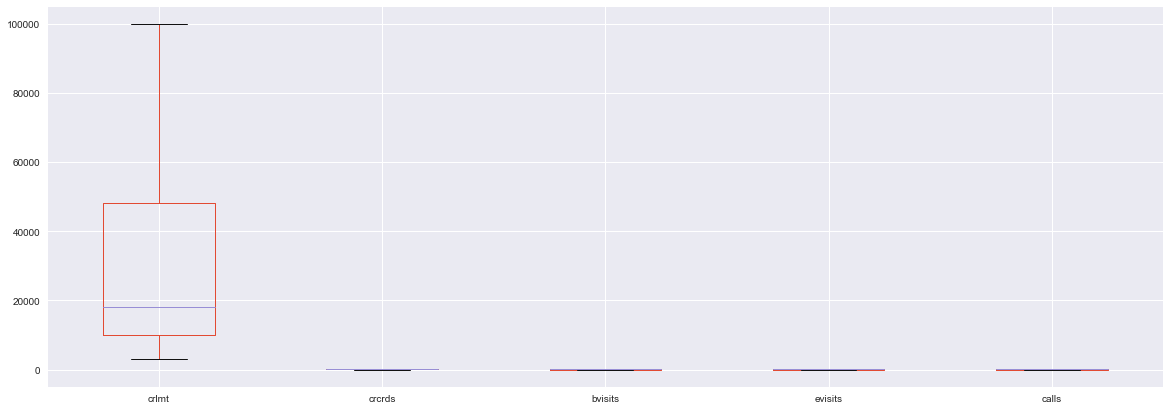

In [14]:
# Now Remove/Impute these Outliers by IQR Method: 'crlmt' and 'evisits' 39 and 37 Outliers respectively: 

# Now Use the Custom Function showOutL() in "Impute" and then "Display" mode: 
showOutL(cdf, mthd='iqr', impute=True)  # For more details Shift+Tab on Function Name or see Function Defiition at the Top 

p = plt.figure(figsize=(20,7))
g = cdf.boxplot()  # Visualize Outliers after Imputations


In [15]:
# Verify that the Outlier for cols 'crlmt', 'evisits' have been removed and No New Outliers were created due to Imputations: 
describeX(cdf, dcols=True)

* DF Stats For All Columns:


cols    dtype      mean       std      min       25%       50%  \
0    crlmt  float64 28,298.48 22,333.39 3,000.00 10,000.00 18,000.00   
1   crcrds  float64      4.71      2.17     1.00      3.00      5.00   
2  bvisits  float64      2.40      1.63     0.00      1.00      2.00   
3  evisits  float64      2.15      1.76     0.00      1.00      2.00   
4    calls  float64      3.58      2.87     0.00      1.00      3.00   

        75%        max  unq  null  zero  <0  skew  OutL  OutH      mode  
0 48,000.00 100,000.00   76     0     0   0  0.98     0     0 48,000.00  
1      6.00      10.00   10     0     0   0  0.14     0     0      4.00  
2      4.00       5.00    6     0   100   0  0.14     0     0      2.00  
3      4.00       8.00    9     0   144   0  0.68     0     0      2.00  
4      5.00      10.00   11     0    97   0  0.66     0     0      4.00

* Rows: 660  * Cols: 5  * Elements: 3300  * DUP.Rows: 22  * DUP.Cols: 0  * Outliers: OutL < Q1-IORx1.5, OutH > Q3+IORx1.5


**My Housekeeping: Incremental DATA Backup 3: ⬇**  

In [16]:
# My Housekeeping: Incremental DF Data Backup 3: 
Markdown("### Incremental DF Data Backup 3") 

cdf3 = cdf.copy()  # DF Modified: Imputed 'cstlmt' (39), 'evisits' (37) 
cdf.to_csv('cdf3.csv')  # Also export as .csv file to disk 

# Verify backup copy 
! ls -l cdf* 
cdf3.shape, type(cdf3) 
cdf3.sample(5) 

### Incremental DF Data Backup 3

-rw-r--r--  1 RiddhiSiddhi  staff  18353 Jul 29 08:18 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18287 Jul 29 08:18 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  11786 Jul 29 08:19 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18314 Jul 29 08:20 cdf3.csv
-rw-r--r--  1 RiddhiSiddhi  staff  66968 Jul 28 18:44 cdf4.csv


((660, 5), pandas.core.frame.DataFrame)

crlmt  crcrds  bvisits  evisits  calls
549 39,000.00    7.00     5.00     2.00   3.00
615 48,000.00    9.00     1.00     4.00   1.00
601 33,000.00    5.00     4.00     0.00   2.00
553 41,000.00    7.00     4.00     1.00   3.00
177 14,000.00    3.00     0.00     4.00   8.00

**My Housekeeping: Incremental CODE Backup 3: ⬇**  

In [96]:
### My Housekeeping: Incremental Jupyter File Code Backup 3 ⬆
Markdown("### Incremental Jupyter Notebook Code Backup 3 ⬆")

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 3.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code Backup 3 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMeans All Life Bank Backup 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMeans All Life Bank Backup 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMeans All Life Bank Backup 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMeans All Life Bank.ipynb


* As per the Imputation Report, BoxPlot, DescribeX Stats Table Above: All Outliers Eliminated ('crlmt', 'evisits'). No New Oultiers Created.  

* However 22 New Duplicate Rows have emerged. Originally there were only 5 Dup Rows. After dropping 'cstid' we got six (6) additional dup.rows totalling 11 dup.rows. After imputing outliers we got 11 more dup rows totalling 22 dup rows.  

* This is inevitable as we drop features and/or change col values via imputations/etc. Since this number is not significant, 22 rows in 660 total rows (3.33%), we will leave these dup.rows as it is.  

* From the BoxPlot, Data Stats and the Data Sampple Displayed above, it is evident that there is major disparity in the Unit Of Measure among the features / variables. Column 'crlmt' is represented in Currency (Money values) going upto max 6 digits numbers, while the rest four (4) columns are plain Number Counts upto max 2 digits. Hence we MUST scale the dataset to bring all column values to a common level field / scale. We will use ZSCORE for scalling:  
  

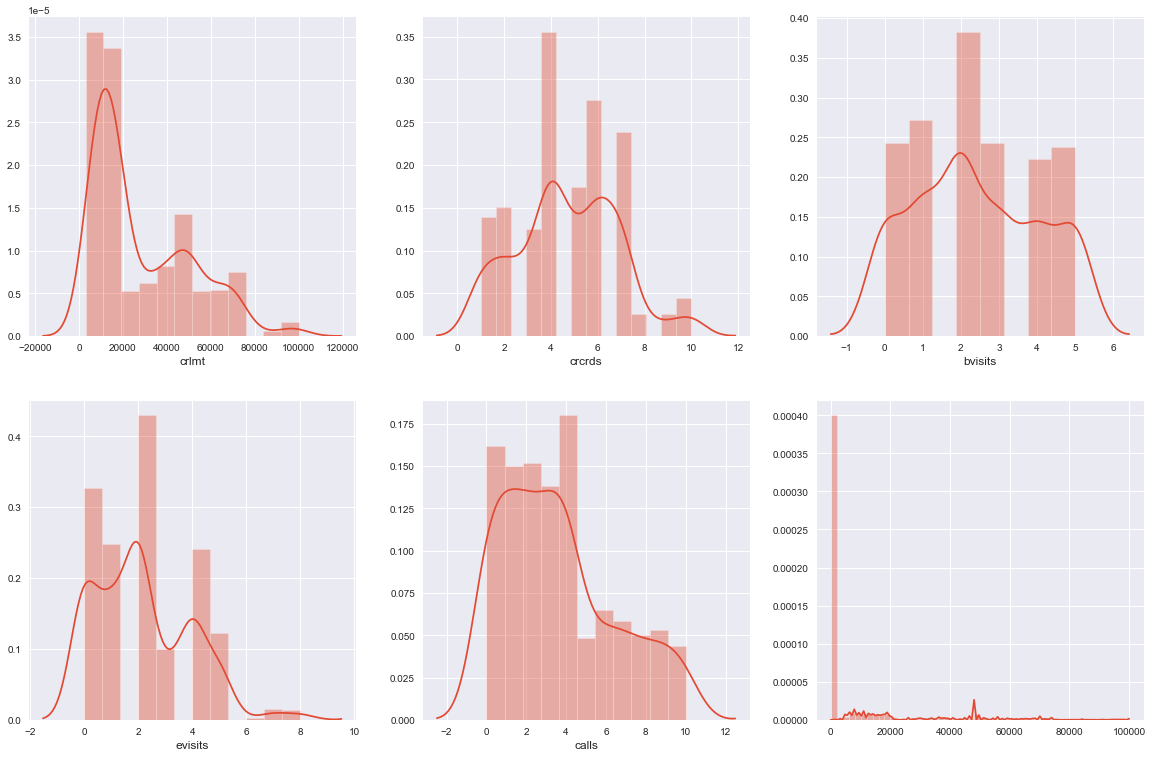

In [17]:
# Individual Histogram of ALL 5 Numerical Columns: Visual Distribution of column values: 
p = plt.figure(figsize=(20, 20)) 

pos = 1 
for col in cdf.columns: 
    p = plt.subplot(3, 3, pos) 
    g = sns.distplot(cdf[col])  # For Each of the 5 Cols in the df
    pos += 1 

p = plt.subplot(3, 3, pos) 
g = sns.distplot(cdf)  # For the entire dataset df 


Observations: From the Distribution Plots above:  
* The dataset itself is highly imbalanced especially by 'crlmt' as apparent from the last (6th) plot above.
* All the Five features have imbalanced distrinution, maybe 'bvisits', 'call' can be excusable but not so.  
* The Features' hump in the above plot indicate multiple Clusters / Groups / Bins like pattern:  
  * crmtl: At Least 3 to 4 clusters
  * crcrds: About 4 clusters
  * bvisits: Roughly 3 clusters
  * evisits: About 3 to 4 clusters
  * calls: Looks like 2 or 3 clusters
* It appears that Three (3) Clusters seems to be common in this Dataset, so we can start or Settle with K=3 in KMeans  
  Clustering. However we will confirm it with further analysis and derive and arrive at that conlusion during Modelling.  

### * Correlation Matrix:

crlmt  crcrds  bvisits  evisits  calls
crlmt     1.00    0.51     0.15    -0.15  -0.44
crcrds    0.51    1.00     0.32    -0.21  -0.65
bvisits   0.15    0.32     1.00    -0.63  -0.51
evisits  -0.15   -0.21    -0.63     1.00   0.42
calls    -0.44   -0.65    -0.51     0.42   1.00

### * Correlation HeatMap Matrix:

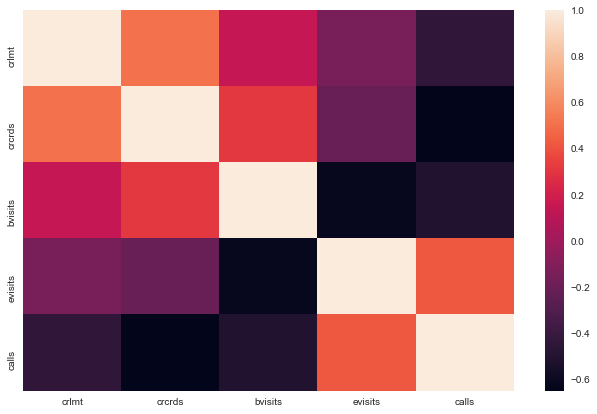

In [18]:
Markdown('### * Correlation Matrix:')
cdf.corr() 

Markdown('### * Correlation HeatMap Matrix:')
p = plt.figure(figsize=(11, 7)) 
g = sns.heatmap(cdf.corr())

Correlation Observations From above matrix:  

* Moderate Correlation:  
  * 'crlmt' and 'crcrds' are Positively correlated (0.51)
  * 'bvisits' and 'calls' are Negatively correlated (-0.51)
* Significant Correlation: 
  * 'evisits' and 'bvisits' are Negatively correlated (-0.63)
  * 'crcrds' and 'calls' are Negatively correlated (-0.65)

Since these are NOT HIghly Correlated like >0.75+ or so we will NOT DROP these columns. Also there are not too many cols.

##### * PairPlot BiVariate Study among Predictor variables with Density Curves (diag_kind="kde")

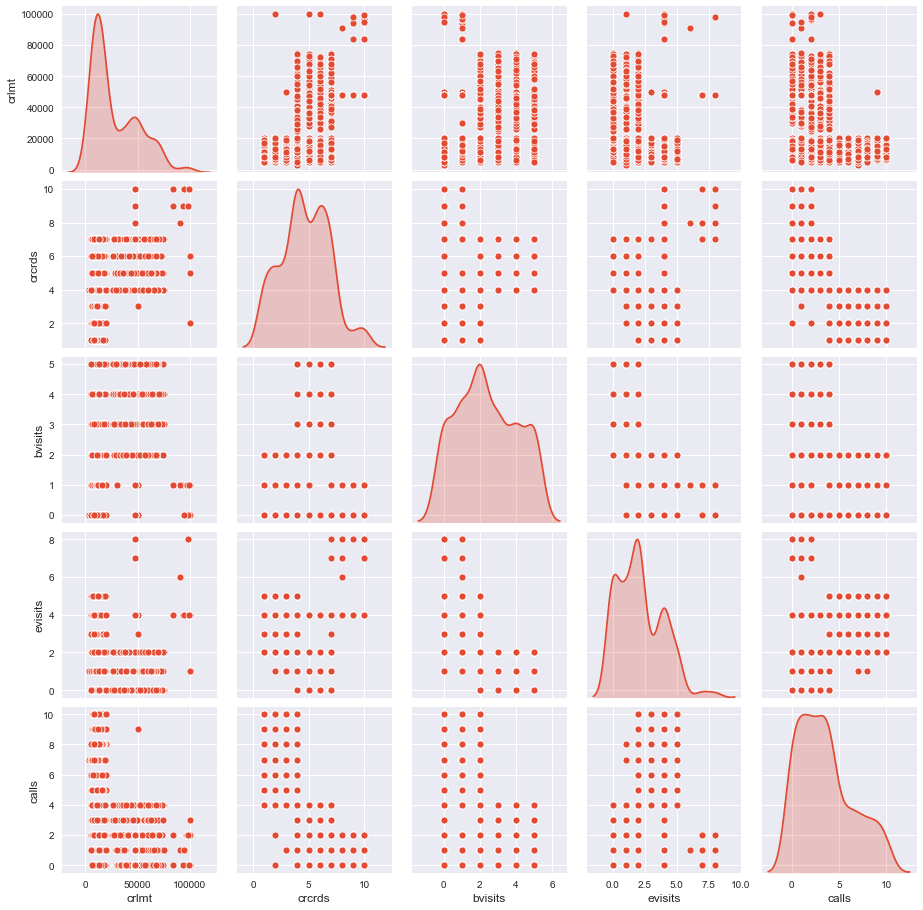

In [25]:
Markdown('##### * PairPlot BiVariate Study among Predictor variables with Density Curves (diag_kind="kde")') 
g = sns.pairplot(cdf, diag_kind='kde')

From the PairPlot above we reconfirm our earlier conclusions that:  
 * There is no High Correlation among variable  
 * Observable Clusters: Two to Four Clusters, Three being most consistent Number of Clusters / Groups of dots above spread along both axis.  

### * PairGrid BiVariate Study among Predictor variables

* <u> Upper Half</u> : Linear Regression Fitted line thru Scatter Plot

* <u> Lower Half</u> : Kernel Densities among Atributes

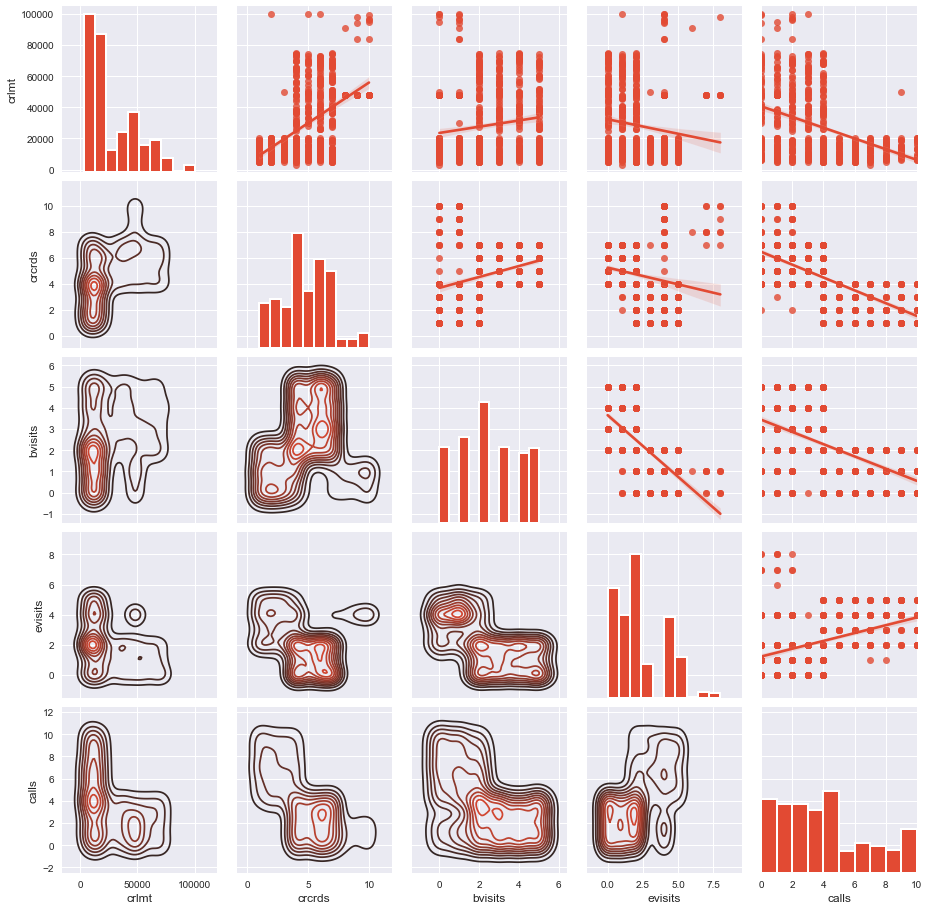

In [26]:
# Additional Exhibit 1: 

# Density, Histogram, Scatter plots of All Attributes Interactions: 
# Different Upper & Lower triangles: eg. Scatter & KDE (Density)

Markdown('### * PairGrid BiVariate Study among Predictor variables')  
Markdown('* <u> Upper Half</u> : Linear Regression Fitted line thru Scatter Plot')  
Markdown('* <u> Lower Half</u> : Kernel Densities among Atributes')  

g = sns.PairGrid(cdf)  

g = g.map_upper(sns.regplot)
g = g.map_lower(sns.kdeplot)

g = g.map_diag(plt.hist, lw=2)
plt.show()


The Density PairGrid above ("Island" like structures) indicated data concentrations and its spread. The "islands" potentially indicates groups / clusters. It seems like Two or Three Clusters seems most consistent in the dataset. We will further derive that as we progress into KMeans and Hierarchical Clustering.

We will now scale the entire dataset using ZSCORE, as we had determined earlier, due the fact that the variables are on a mixed Unit Of Measure and the number greatly vary in terms of Size (Magnitude). For eg. 'crlmt' number goes upto 6 digits while all other variables go up to 2 digit numbers. So all variables need to be brought to a common scale and hence get rid of the Individual Unit Of Measurements.

In [31]:
cdf = cdf.apply(zscore)
cdf.head()

crlmt  crcrds  bvisits  evisits  calls
0   3.21   -1.25    -0.86    -0.65  -1.25
1   0.97   -0.79    -1.47     1.06   1.89
2   0.97    1.06    -0.86     0.49   0.15
3   0.08    0.14    -0.86    -0.65   0.15
4   3.21    0.60    -1.47     1.06  -0.20

In [32]:
describeX(cdf, dcols=True, srows='r0')

* DF Stats For All Columns:


cols    dtype  mean  std   min   25%   50%  75%  max  unq  null  zero  \
0    crlmt  float64 -0.00 1.00 -1.13 -0.82 -0.46 0.88 3.21   76     0     0   
1   crcrds  float64 -0.00 1.00 -1.71 -0.79  0.14 0.60 2.44   10     0     0   
2  bvisits  float64  0.00 1.00 -1.47 -0.86 -0.25 0.98 1.59    6     0     0   
3  evisits  float64 -0.00 1.00 -1.22 -0.65 -0.08 1.06 3.34    9     0     0   
4    calls  float64 -0.00 1.00 -1.25 -0.90 -0.20 0.49 2.24   11     0     0   

    <0  skew  OutL  OutH  mode  
0  401  0.98     0     0  0.88  
1  327  0.14     0     0 -0.33  
2  370  0.14     0     0 -0.25  
3  442  0.68     0     0 -0.08  
4  361  0.66     0     0  0.15

* Rows: 660  * Cols: 5  * Elements: 3300  * DUP.Rows: 22  * DUP.Cols: 0  * Outliers: OutL < Q1-IORx1.5, OutH > Q3+IORx1.5



'Showing Random 10 Rows:'

crlmt  crcrds  bvisits  evisits  calls
335  -0.42    0.60     1.59    -0.08  -1.25
3     0.08    0.14    -0.86    -0.65   0.15
308  -0.82   -0.33     1.59    -1.22  -0.20
636   0.88    2.44    -0.86     3.34  -1.25
573   1.69    1.06    -0.25    -0.08  -0.20
275  -0.55    0.60    -0.25    -0.65  -0.20
31   -0.78   -0.79    -0.86     1.63   0.84
136  -0.51   -0.79    -1.47    -0.08   1.54
625   2.81    1.52    -0.86     2.20  -0.90
364  -0.69    0.60     0.98    -0.08  -0.20

**My Housekeeping: Incremental DATA Backup 4: ⬇**  

In [33]:
# My Housekeeping: Incremental DF Data Backup 4: 
Markdown("### Incremental DF Data Backup 4") 

cdf4 = cdf.copy()  # DF Modified: 1. Imputed 'cstlmt' (39), 'evisits' (37) ; 2. SCALED with ZSORE 
cdf.to_csv('cdf4.csv')  # Also export as .csv file to disk 

# Verify backup copy 
! ls -l cdf* 
cdf4.shape, type(cdf4) 
cdf4.sample(6) 

### Incremental DF Data Backup 4

-rw-r--r--  1 RiddhiSiddhi  staff  18353 Jul 29 08:18 cdf0.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18287 Jul 29 08:18 cdf1.csv
-rw-r--r--  1 RiddhiSiddhi  staff  11786 Jul 29 08:19 cdf2.csv
-rw-r--r--  1 RiddhiSiddhi  staff  18314 Jul 29 08:20 cdf3.csv
-rw-r--r--  1 RiddhiSiddhi  staff  66968 Jul 29 08:26 cdf4.csv


((660, 5), pandas.core.frame.DataFrame)

crlmt  crcrds  bvisits  evisits  calls
100  -0.78   -1.71    -1.47     1.63   0.84
311  -0.82    0.60     0.37    -1.22  -1.25
158  -0.82   -0.79    -0.25     1.63   1.89
395  -1.04   -0.33     1.59    -1.22  -0.90
602   0.39    1.06     0.98    -1.22  -0.90
619   0.88    1.06    -1.47     1.06  -1.25

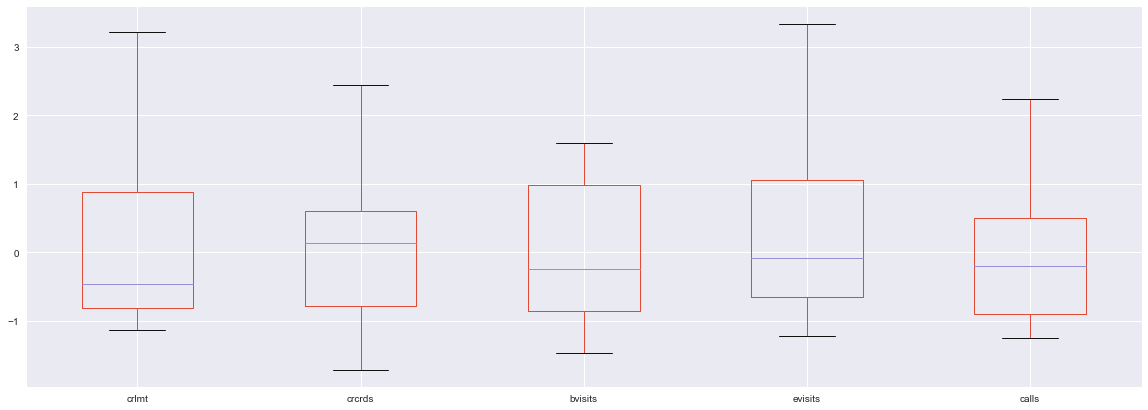

In [34]:
p = plt.figure(figsize=(20,7))
g = cdf.boxplot()  # Visualize Outliers after Imputations


* This BoxPlot after Scaling is very much Better than the BoxPlot we had before Scalling. Now all cols/variable values are on the same sacle and unlike before they DO NOT vary drastically. Ealier we have had like 'Fruits & 'Vegetables' but now we have all 'Fruits' that too all 'Apple' of different kinds. So we now compare and work with "Apples To Apples" !

### D1. Completed & Delivered : Univariate Analysis : Ends Here: ⬆  

* **Performed & Delivered the Following Items**:  
  * Perform EDA: 
    * Derived Standard & Extended Dataset Stats, Identified Dup. Rows/Cols, Null, Zeros, -ve Vals, Uniques, Skewness, Mode, Outliers & Eliminated Outliers  
    * Wrote Reusable & Publishable Functions to automate this vital EDA Tabulation and Outlier Handeling  
  * Create Visualizations to explore data  
    * Generated Distriution Plots, BoxPlots, Correlation Matrix & Heatmap, PairPlot, PairGrid with Densities, 
  * Understand the variables to get an idea about the Number of Clusters  
    * Identified Potential CLUSTERS (about 3 Clusters) from the above two techniques  
  * Comments on the Codes, Explanations on Steps taken. Conclude insights from Graphs  
    * Provided Relevant Code Comments in every code cell plus Markdown cells  
    * Explained all Actions/Steps taken  
    * Conclusion provided at the end of every major Step/Action  


**My Housekeeping: Incremental CODE Backup 4: ⬇**  

In [121]:
### My Housekeeping: Incremental Jupyter File Code Backup 4 ⬆  
Markdown("### Incremental Jupyter Notebook Code Backup 4 ⬆") 

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 4.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code Backup 4 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMeans All Life Bank Backup 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMeans All Life Bank Backup 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMeans All Life Bank Backup 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMeans All Life Bank Backup 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMeans All Life Bank.ipynb


### D2. Execute K Means Clustering : Starts Here : ⬇  
  * Use Elbow Plot and Analyse Clusters using BoxPlot  

In [35]:
# Find Optimum Number of Clusters: # Note: Data is SCALED with zscore and NO Outliers (i.e. Data is "Conditioned"): 
# Now Create Clusters: 

cluster_range = range(1,15)
cluster_errors = []
for k_clusters in cluster_range:
    clusters = KMeans(k_clusters, n_init = 5)
    clusters.fit(cdf)  # Data Scaled with zscore
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"k_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]


KMeans(n_clusters=1, n_init=5)

KMeans(n_clusters=2, n_init=5)

KMeans(n_clusters=3, n_init=5)

KMeans(n_clusters=4, n_init=5)

KMeans(n_clusters=5, n_init=5)

KMeans(n_clusters=6, n_init=5)

KMeans(n_clusters=7, n_init=5)

KMeans(n_init=5)

KMeans(n_clusters=9, n_init=5)

KMeans(n_clusters=10, n_init=5)

KMeans(n_clusters=11, n_init=5)

KMeans(n_clusters=12, n_init=5)

KMeans(n_clusters=13, n_init=5)

KMeans(n_clusters=14, n_init=5)

k_clusters  cluster_errors
0            1        3,300.00
1            2        1,809.07
2            3        1,287.54
3            4          992.58
4            5          895.78
5            6          843.79
6            7          764.31
7            8          723.46
8            9          680.06
9           10          655.26
10          11          622.35
11          12          607.47
12          13          571.26
13          14          550.04

<Figure size 864x432 with 0 Axes>

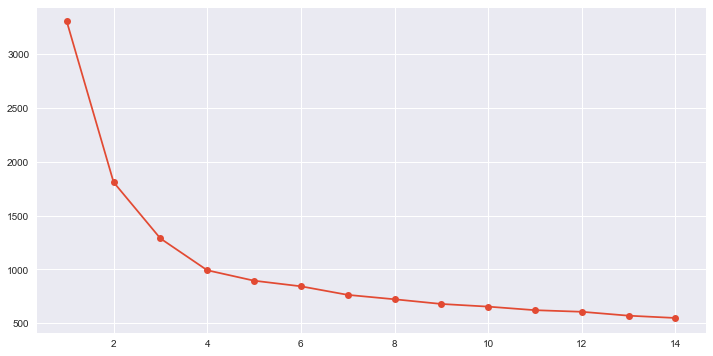

In [36]:
# Now do the "Elbow Plot": Very IMP in helping us decide the Optimal Number Of Clusters: 

plt.figure(figsize=(12,6))
plt.plot( clusters_df.k_clusters, clusters_df.cluster_errors, marker = "o" )

**The "Big Bend" is at "4" ⬆ in the above Elbow Plot, which indicates that 4 is the Optimal Number of Clusters**

In [37]:
# Since the Sharp / Big Bend is at 4 (Optimal Clusters), lets create 4 Custers: 

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=6)
kmeans.fit(cdf)

KMeans(n_clusters=4, n_init=5, random_state=6)

In [38]:
# Number of data items in each cluster:

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 51 161 222 226]


In [39]:
# In the 3rd and 4th cluster above, the data distribution look uneven.
# Lets create 3 cluster now. Maybe the the last two cluster might merge and give us a better data distribution among the clusters

kmeans = KMeans(n_clusters=3, n_init = 10, random_state=6)
kmeans.fit(cdf)

KMeans(n_clusters=3, random_state=6)

In [40]:
# Get the Number of data items in each cluster:

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[223 386  51]


⬆ The data distribution above appears quite uneven across the 4 clusters and 3 clusters produced after kmeans n_clusters (k=3 & k=4).  Hence lets try some feature enginering on the columns:  
⬇ Tried running kmeans on various combinations of features by merge various features/columns as follows: (Outputs of each kmeans run for a combination has been removed to reduce notebook clutter:  

In [41]:
# * Tried various combinations of two of these three cols bvisits, evisits, calls at a time: 

# * Combine bvisits + evisits into one col 'bevisits' : 
# cdf_combo = pd.DataFrame(cdf.crlmt)
# cdf_combo['crcrds'] = cdf.crcrds
# cdf_combo['bevisits'] = cdf.bvisits + cdf.evisits 
# cdf_combo['calls'] = cdf.calls
# cdf_combo
# cdf_combo = cdf.bvisits + cdf.bvisits

# * Combine evisits + calls in to one columns...etc. (Code removed to reduce clutter)

# * Combine bvisits + evisits + calls into one col 'xvisits' : 
# cdf_combo = pd.DataFrame(cdf.crlmt)
# cdf_combo['crcrds'] = cdf.crcrds
# cdf_combo['xvisits'] = cdf.bvisits + cdf.evisits + cdf.calls
# cdf_combo

# cdf_combo = cdf.copy()
# cdf_combo.pop('calls')
# cdf_combo

# cdf_combo = pd.DataFrame(cdf.crlmt)
# cdf_combo['crcrds'] = cdf.crcrds
# cdf_combo

# cdf_combo = cdf3.copy()  # UnSCALED !!!
# np.log(cdf_combo.crlmt)
# cdf_combo.crlmt = np.log(cdf_combo.crlmt)
# cdf_combo['xvisits'] = cdf.bvisits + cdf.evisits + cdf.calls


Experiment: Ran kmeans on various above combinations for various of values n_clusters (k = 3 thru 8) to produce various number of Clusters.  
Conclusion: Best (most even / balanced) data distribution across clusters was obtained :  
* With n_clusters = 4 (k=4) to produce 4 Cluster (the elbow plot above did gave a perfect indication for optimal number of Clusters)  
* By combining columns 'bvisits' + 'evisits' + 'calls' into one single column 'xvisits' (Total number of "Contacts" with the Bank in All various forms)  
* By scaling col 'crlmt' was using np.log()  
* Cols 'crcrds', 'xvisits' were left UnScaled. Because after scalling 'crlmt' from "currency" type numeric value (6 digits) to log scalled values (2 digits) it natrually came in to the scale of these three columns (count type numeric values, 2 digits). This brought all cols on a similar scale by its numeric values of range 1 thru about 16 (2 digit numbers). See below: Min, Max values produced for each column by the describeX() custom function.  


ACTION: FINAL: Considering points above, we will hence proceed with :  
* n_clusters = 4 (k=4)  
* Four Engineered Columns in df:  
  * col 'crlmt'  : log Scaled  
  * col 'crcrd'  : UnScaled  
  * col 'xvisits : 'bvisits' + 'evisits' + 'calls' (from Original columns)  


* cdf_combo df data:


crlmt  crcrds  xvisits
0    11.51    2.00     2.00
1    10.82    3.00    13.00
2    10.82    7.00     8.00
3    10.31    5.00     6.00
4    11.51    6.00     7.00
..     ...     ...      ...
655  11.50   10.00     5.00
656  11.34   10.00     7.00
657  10.78    8.00     6.00
658  10.78   10.00     5.00
659  10.78    9.00     6.00

[660 rows x 3 columns]


* Outliers Detection: IQR Method: For All Numerical Columns: LOW Whisker = Q1 - (IQR * 1.5); HIGH Whisker = Q3 + (IQR *1.5): 


* Column: crlmt : Total 0 Outlier Values: NO OUTLIERS!

* Column: crcrds : Total 0 Outlier Values: NO OUTLIERS!

* Column: xvisits : Total 0 Outlier Values: NO OUTLIERS!
* DF Stats For All Columns:


cols    dtype  mean  std  min  25%  50%   75%   max  unq  null  zero  \
0    crlmt  float64  9.93 0.82 8.01 9.21 9.80 10.78 11.51   76     0     0   
1   crcrds  float64  4.71 2.17 1.00 3.00 5.00  6.00 10.00   10     0     0   
2  xvisits  float64  8.13 3.15 2.00 6.00 8.00 10.00 16.00   15     0     0   

   <0  skew  OutL  OutH  mode  
0   0  0.08     0     0 10.78  
1   0  0.14     0     0  4.00  
2   0  0.44     0     0  7.00

* Rows: 660  * Cols: 3  * Elements: 1980  * DUP.Rows: 96  * DUP.Cols: dcols=False  * Outliers: OutL < Q1-IORx1.5, OutH > Q3+IORx1.5

* See Above^: The Min & Max values of the between 1 & 16. The Mean & SD values are not too far away from each other.



KMeans(n_clusters=1, n_init=5, random_state=6)

KMeans(n_clusters=2, n_init=5, random_state=6)

KMeans(n_clusters=3, n_init=5, random_state=6)

KMeans(n_clusters=4, n_init=5, random_state=6)

KMeans(n_clusters=5, n_init=5, random_state=6)

KMeans(n_clusters=6, n_init=5, random_state=6)

KMeans(n_clusters=7, n_init=5, random_state=6)

KMeans(n_init=5, random_state=6)

KMeans(n_clusters=9, n_init=5, random_state=6)

KMeans(n_clusters=10, n_init=5, random_state=6)

KMeans(n_clusters=11, n_init=5, random_state=6)

KMeans(n_clusters=12, n_init=5, random_state=6)

KMeans(n_clusters=13, n_init=5, random_state=6)

KMeans(n_clusters=14, n_init=5, random_state=6)

k_clusters  cluster_errors
0            1       10,071.35
1            2        4,354.09
2            3        3,200.10
3            4        2,491.70
4            5        2,058.23
5            6        1,749.04
6            7        1,594.99
7            8        1,383.69
8            9        1,269.91
9           10        1,139.44
10          11        1,059.93
11          12          978.53
12          13          937.24
13          14          870.80

<Figure size 864x432 with 0 Axes>

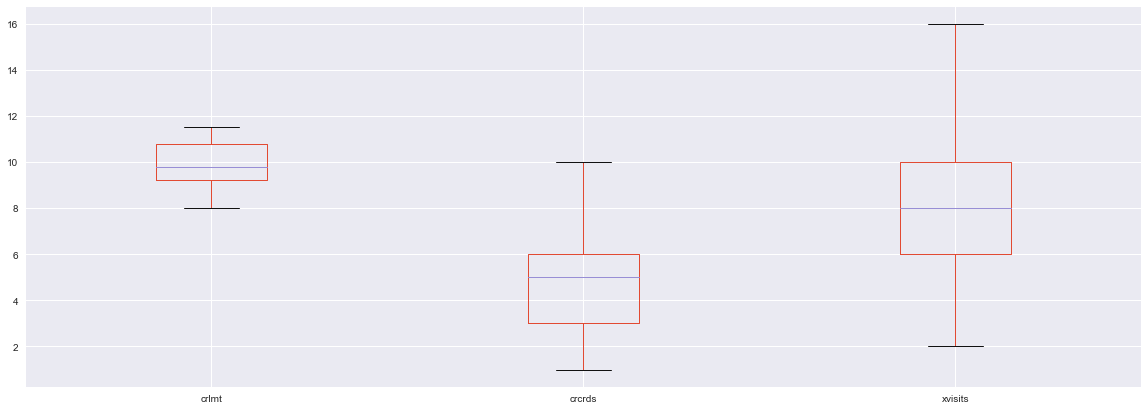

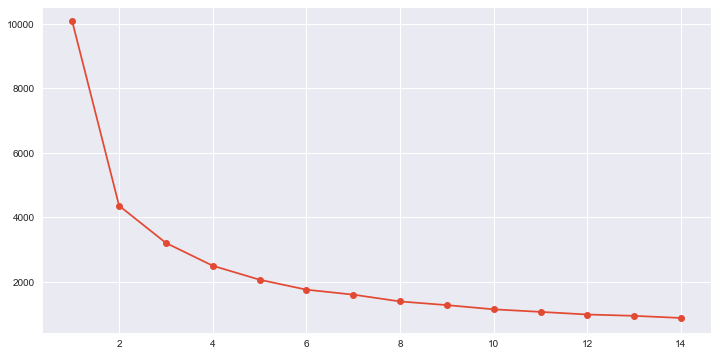

In [243]:
# Let prepare the data as per above Decided Final Action:  

cdf_combo = pd.DataFrame(np.log(cdf3.crlmt))  # This col 'crlmt' is Log SCALED !!!
cdf_combo['crcrds'] = cdf3.crcrds  # This col 'crcrds' is UnSCALED !!!
cdf_combo['xvisits'] = cdf3.bvisits + cdf3.evisits + cdf3.calls  # These three cols are UnSCALED !!!

print('\n* cdf_combo df data:')
cdf_combo

p = plt.figure(figsize=(20,7))
g = cdf_combo.boxplot()  # After Log Scaling column 'crlmt' only (only 1 column scaled); Plot to ckeck distribution

showOutL(cdf_combo)  # Check this new df for any Outliers

describeX(cdf_combo)  # get df vital stats for this new df

print('\n* See Above^: The Min & Max values of the between 1 & 16. The Mean & SD values are not too far away from each other.\n')
# Find Optimum Number of Clusters: # Note: Data is SCALED with zscore and NO Outliers (i.e. Data is "Conditioned"): 
# Now Create Clusters: 

cluster_range = range(1,15)
cluster_errors = []

for k_clusters in cluster_range:
    clusters = KMeans(k_clusters, n_init = 5, random_state=6)
    clusters.fit(cdf_combo)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"k_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

# Now do the "Elbow Plot": Very IMP in helping us decide the Optimal Number Of Clusters: 

plt.figure(figsize=(12,6))
plt.plot( clusters_df.k_clusters, clusters_df.cluster_errors, marker = "o" )


⬆ Box Plot: Data Distribution look OK in the Dataframe after Scaling and Featuring Enginering  
⬆ Elbow Plot: Best Elbow is still at "4" (Four)  

👍 This processed df is Good To Go and will proceed accordingly with further kmeans process:  

In [244]:
# On df cdf_combo, lets create 4 Custers: 

kmeans = KMeans(n_clusters=4, n_init = 3, random_state=6)
kmeans.fit(cdf_combo)

# Number of data items in each cluster:

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

KMeans(n_clusters=4, n_init=3, random_state=6)

[147 184 162 167]


<AxesSubplot:>

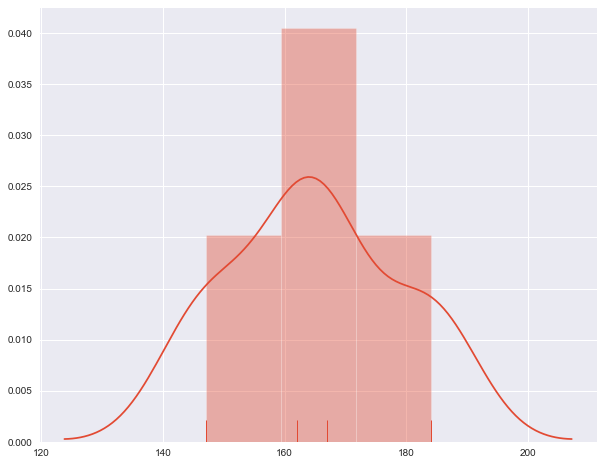

In [45]:
sns.distplot(counts, rug=True)

⬆ Data items seem Normally Distributed across the above 4 clusters. Looks pretty much even/balanced & its good now! 👍

In [46]:
# Will stay and work futher with this df (cdf_combo): 
# Col 'crlmt' : log scaled; Cols 'crcrd', 'xvisits' : UnScaled' 
# Note: Col 'xvisits' (derived from original cols) = 'bvisits' + 'evisits' + 'calls' 

# Lets check the Centers in each group/cluster

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cdf_combo) )
centroid_df.transpose()

0     1     2    3
crlmt    9.32 10.22 10.34 9.75
crcrds   2.32  5.38  7.21 3.63
xvisits 12.73  4.71  7.57 8.40

**Observations / Conclusions: Group/Cluster Analysis derived from above table:**

Observations: 
* crlmt   : Credit Limit: Highest in Group 2 & Lowest in Group 0 (Total Credit Limit A Customer has on all his/her Credit Cards)  
* crcrds  : Credit Cards: Highest in Group 2 & Lowest in Group 0 (Toral Number Of Credits Cards a Customer has)  
* xvistis : Visits/Calls: Highest in Group 0 & Lowest in Group 1 (Toral Number Of Contacts: Bank Visits + Online Logins + Voice Calls)  

Conclusions:
1. The above confirms as seen in Correlation & Pairplot: Customers with High Credit Limits / More Credit Cards, they have LESS Contact with the Bank. And Vice Versa: Customers who have less Credit Limits & Cards, have MORE contact with the Bank.  

2. Group 0 Customers appears to be either New to Bank or are New or Less Experienced Credit User (maybe like younger customers, etc.,  because the have LESS Credit. And since they are "New" in some ways they tend to come in Bank's "Contact" MORE often then other the "Experience" groups which potentially indicated by their Total Credit & Card count which generally comes with to Customers who have good past Credit i.e who are "Experienced" in using / handlding Credit products.  

3. Groups 1 & 2 seem to be "Experienced" Credit users and seems to know their Bank's working and product, hence they seem to "Contact" the Bank LESS often then Group 0 and Group 3. OR Probably they know that there is NOT MUCH VALUE is the Bank's Customer Service OR maybe they know pretty much everything the Bank's Customer Service has to offer them.  


In [47]:
# Add Cluster's Group / Label Number to Original dataset saved in dataframe 'cdf0': 

cdf_kmGrp_labeled = cdf0.copy()  # restore the original df in a new df for labeling with the newly indetified kmeans groups/labels

predictions = kmeans.predict(cdf_combo)
predictions
cdf_kmGrp_labeled["group"] = predictions
cdf_kmGrp_labeled['group'] = cdf_kmGrp_labeled['group'].astype('category')

print('\n* Original unprocess dataset below, restored in a new df "cdf_kmGrp_labeled" is now labled in the new column "group": \n')
cdf_kmGrp_labeled.info()
cdf_kmGrp_labeled.head()

array([1, 0, 2, 1, 2, 3, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 0, 3, 3, 0, 3, 0, 1, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3,
       3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 3, 3, 1,
       3, 2, 1, 1, 1, 3, 3, 2, 2, 2, 3, 1, 3, 3, 2, 2, 2, 1, 1, 1, 1, 3,
       1, 1, 3, 2, 1, 2, 3, 1, 3, 2, 1, 1, 2, 3, 1,


* Original unprocess dataset below, restored in a new df "cdf_kmGrp_labeled" is now labled in the new column "group": 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sl_No                660 non-null    int64   
 1   Customer Key         660 non-null    int64   
 2   Avg_Credit_Limit     660 non-null    int64   
 3   Total_Credit_Cards   660 non-null    int64   
 4   Total_visits_bank    660 non-null    int64   
 5   Total_visits_online  660 non-null    int64   
 6   Total_calls_made     660 non-null    int64   
 7   group                660 non-null    category
dtypes: category(1), int64(7)
memory usage: 37.1 KB


Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made group  
0                  1                    1                 0     1  
1                  0                   10                 9     0  
2                  1                    3                 4     2  
3                  1                    1                 4     1  
4                  0                   12                 3     2

In [48]:
# Export this KMeans Cluster Labeled dataset df into a .csv disk file for any further analysis: 

writer = ExcelWriter('ALL Life Bank CrCrd CustData Kmeans Cluster Group Labeled.xls') 
cdf_kmGrp_labeled.to_excel(writer,'Sheet1')
writer.save()
! ls -l *.xls


-rw-r--r--  1 RiddhiSiddhi  staff  58880 Jul 29 08:34 ALL Life Bank CrCrd CustData Kmeans Cluster Group Labeled.xls


crlmt  crcrds  xvisits  group
0  11.51    2.00     2.00      1
1  10.82    3.00    13.00      0
2  10.82    7.00     8.00      2
3  10.31    5.00     6.00      1
4  11.51    6.00     7.00      2

0         AxesSubplot(0.1,0.679412;0.173913x0.220588)
1    AxesSubplot(0.308696,0.679412;0.173913x0.220588)
2    AxesSubplot(0.517391,0.679412;0.173913x0.220588)
3    AxesSubplot(0.726087,0.679412;0.173913x0.220588)
dtype: object

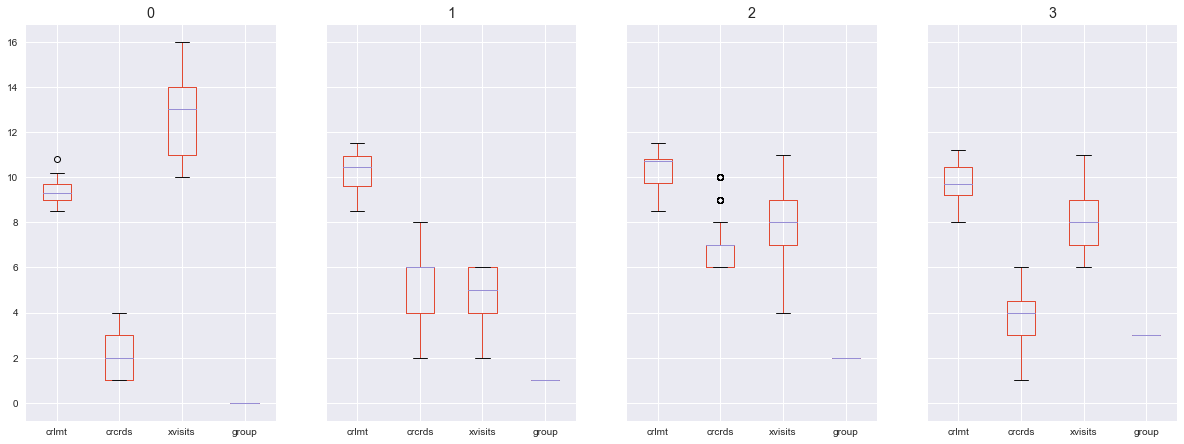

In [49]:
# Visualize the Clusters / Centers: 
# Add a new column "group" to the current / processed dataset df to and populate it with the kmeans derived Cluster Group Label

cdf_combo["group"] = predictions
cdf_combo.head()

# cdf_combo.boxplot(by=cdf_combo.group)  # Doesnt work (bug?) matplotlib v3.3 (installed), needs lower version, but I dont wnat mess up!
cdf_combo.groupby('group').boxplot(layout=(3,4), figsize=(20, 25))  # matplotlib v3.3 issue: Hence using this method for boxplot

# cdf_combo_grp = cdf_combo.groupby(cdf_combo.group) # .boxplot(layout=(3,4), figsize=(20, 25))
# cdf_combo_grp # .boxplot(layout=(3,4), figsize=(20, 25))

⬆ From the Box Plots above for each of the 4 Group/Clusters we can recofirm our that our earlier Observations & Conclusions about these clusters were Correct 👍

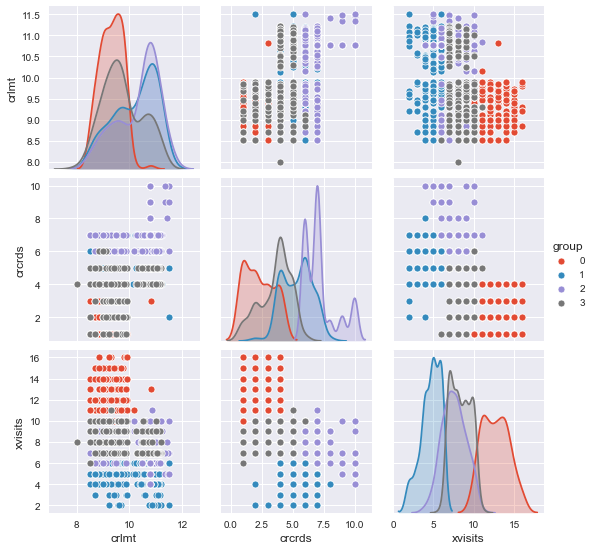

In [50]:
# More visualizations to confirm our earlier findings about the clusters just after the cluster were finilazed after creations: 
# Now we can better see the Groups / Clusters identified by color coded keys / legend
# We are now able to see multiple Gaussians (curves/humps) that were hidden earlier before the kmeans cluster identification.
# Gaussians indicate the Groups/Clusters that we just identified.
# We can also see the Groups/Clusters in the Scatter plots below that were hidden earlier before the kmeans cluster identification.

sns.pairplot(cdf_combo, hue='group')

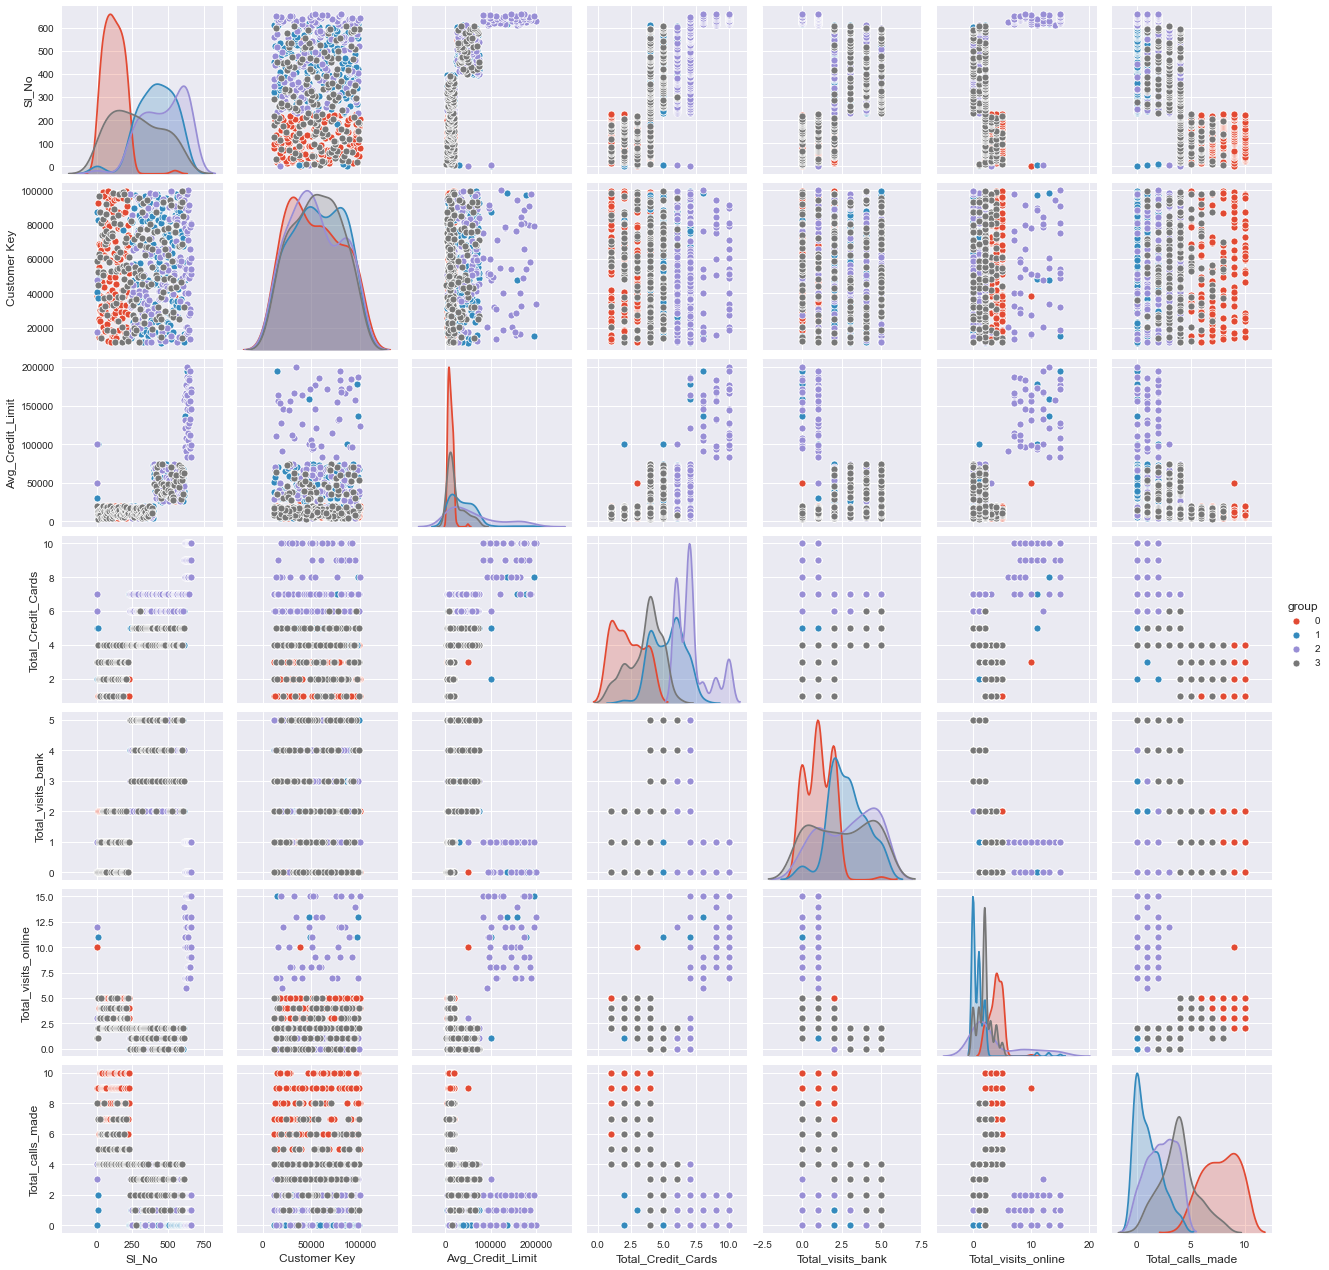

In [47]:
# PairPlot for the Original data with kmeans Clusters Labels: 
# Compare the plot below with that of PairPLot which we plotted earlier just after UniVariate Analysis, before kmeans Analysis.
# At the time, it was not easy to decode an groups with it. Now the groups are much clearer with color coding identification.
# We can now see the multiple Gaussians (curves/humps) that were hidden earlier before the kmeans cluster identification.
# Gaussians indicate the Groups/Clusters that we just identified.
# We can also see the Groups/Clusters in the Scatter plots below that were hidden earlier before the kmeans cluster identification.

# This was made possible only the help of K Means Clustering technique!

sns.pairplot(cdf_kmGrp_labeled, hue='group')

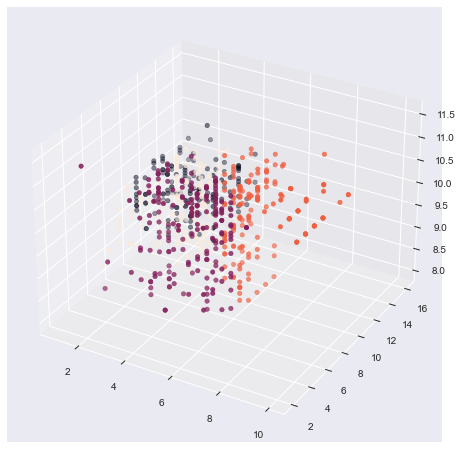

In [51]:
# Dataset in three-dimensional Scattered Plot: More Visual Aid to Confirm our earlier findings: 
# Notice the Groups/Clusters in the 3D Scatter plot below that were hidden in 2D in above plots. 

ax = plt.axes(projection='3d')
zdata = cdf_combo.crlmt
xdata = cdf_combo.crcrds
ydata = cdf_combo.xvisits
ax.scatter3D(xdata, ydata, zdata, c=cdf_combo.group);

### D2. Completed & Delivered: Execute K Means Clustering : Ends Here : ⬆  
 * Use Elbow Plot and Analyse Clusters using BoxPlot:  
   * Performed all steps and derived the required parameters & data to plot the ELBOW PLOT as exhibited in this section above. This helped determining the value for "K" as identified by the "Big" or "Sharp" Bend in the ELBOW PLOT above.  
   
   * Performed all steps and derived the required parameters, data and the Cluster Group Labels to plot the BOX PLOT for all 3 dataset attributes grouped by each of the 3 GROUP/Clusters. This is exhibited in this section above.  
   
   * Cluster Analysis based on BoxPlots and other derivatives / techniques have been provided above in the Markdown text box cell in this section above.
           

**My Housekeeping: Incremental CODE Backup 5: ⬇**  

In [111]:
### My Housekeeping: Incremental Jupyter File Code Backup 5 ⬆  
Markdown("### Incremental Jupyter Notebook Code Backup 5 ⬆") 

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 5.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code Backup 5 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMC & HCluster ALL Life Bank 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMC & HCluster ALL Life Bank 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMC & HCluster ALL Life Bank 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMC & HCluster ALL Life Bank 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  7809730 Jul 27 02:45 Project 5 USL KMC & HCluster ALL Life Bank 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  7809730 Jul 27 02:45 Project 5 USL KMC & HCluster ALL Life Bank.ipynb


### D3. Execute Hierarchical Clustering : Starts Here: ⬇  
  * Execute with Different Linkages with the help of Dendrogram and Cophenetic Coefficient  
  * Analyse Clusters formed using BoxPlot  


In [52]:
cdf_combo.head()

crlmt  crcrds  xvisits  group
0  11.51    2.00     2.00      1
1  10.82    3.00    13.00      0
2  10.82    7.00     8.00      2
3  10.31    5.00     6.00      1
4  11.51    6.00     7.00      2

In [53]:
# Prepare data dfs for HC runs: 

custDataAttr = cdf0.copy()  # Restore Original saved df ("cdf0") in a new df for labeling with HC cluster label numbers 

cdf_combo_kmGrp = cdf_combo.copy()  # Save df labeled with Kmeans Cluster groups

# Remove col 'group' labeled by KMeans to retrieve our original working df, so that we can the same processed df for HC: 
cdf_combo.drop(['group'], axis = 1, inplace = True)  

print('\n* custDataAttr df head rows: Original data restored / copied in this df for HC labelling:')
custDataAttr.head()

print('\n* cdf_combo df head rows: "Originalized" processed df: Previous kmeans label (col: "group") removed for HC runs / processing:')
cdf_combo.head()


* custDataAttr df head rows: Original data restored / copied in this df for HC labelling:


Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3


* cdf_combo df head rows: "Originalized" processed df: Previous kmeans label (col: "group") removed for HC runs / processing:


crlmt  crcrds  xvisits
0  11.51    2.00     2.00
1  10.82    3.00    13.00
2  10.82    7.00     8.00
3  10.31    5.00     6.00
4  11.51    6.00     7.00

In [54]:
# Executing HC Agglomerative for Clusters = 4 (same as in kmeans above), data = cdf_combo (same data processed as in kmeans above)

# Tried running HC for n_clusters = 2, 3, 4, 5. Best data point distribution was with n_cluster = 4 (Code removed to reduce clutter)
# Hence will run HC for various values of 'linkages" (Proj Req.) with n_clusters = 4 (Cluster to find):

# Cluster results df containing data item counts each Cluster by for various values of linkages: 'single', 'complete', 'average', 'ward'
HCresults = pd.DataFrame() 

lnkTyp = ['single', 'complete', 'average', 'ward']

for lnk in lnkTyp:
    print('HC for linkage = ', lnk)

    HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage=lnk)
    HCmodel.fit(cdf_combo)

    custDataAttr['labels'] = HCmodel.labels_

    HCresults[lnk] = custDataAttr.groupby(["labels"]).count()['Sl_No']  # use any df col to count() items in clusters for current linkage 

HCresults


HC for linkage =  single


AgglomerativeClustering(linkage='single', n_clusters=4)

HC for linkage =  complete


AgglomerativeClustering(linkage='complete', n_clusters=4)

HC for linkage =  average


AgglomerativeClustering(linkage='average', n_clusters=4)

HC for linkage =  ward


AgglomerativeClustering(n_clusters=4)

single  complete  average  ward
labels                                 
0            4       169      227   271
1          654       183      364   106
2            1       125       32   179
3            1       183       37   104

⬆ Among all 4 method above, with linkage='complete' method, data seems most normally / evenly distributed within each of the 4 clusters/labels above.  
⬇ Hence, lets use 'complete' linkage method to summarize using mean() & to view summarized data values by each column within each clusters/labels:  

In [55]:
# The last iteration of HC was for 'complete' linkage, so the labels on the dataset are still in place. 
# So lets summarize the Bank's Credit Card Customer Data from the existing df which is already labeled from HC 'complete' linkage method: 

print('\n* Head df data with HC "labels" using "complete" linkage: ')
custDataAttr.head()  # Show sample data with labels

print('\n* Within Cluster/Group summarized (grouped by HC "label") "mean()" values of Customer Attributes using "complete" linkage: ')
custDataAttr.iloc[:, 2:].groupby(["labels"]).mean()  # Skip first 2 cols ('Sl_No', Customer Key) for summary using mean() 


* Head df data with HC "labels" using "complete" linkage: 


Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  labels  
0                  1                    1                 0       2  
1                  0                   10                 9       3  
2                  1                    3                 4       0  
3                  1                    1                 4       0  
4                  0                   12                 3       0


* Within Cluster/Group summarized (grouped by HC "label") "mean()" values of Customer Attributes using "complete" linkage: 


Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0              38,114.39                5.25               3.38   
1              12,443.40                2.55               1.11   
2              55,318.44                6.61               2.47   
3              12,201.92                2.19               1.06   

        Total_visits_online  Total_calls_made  
labels                                         
0                      1.69              2.58  
1                      3.21              5.57  
2                      2.80              1.12  
3                      4.03              8.43

⬆ Credit Limit seems somewhat Directly Proportional to Number of Credit Cards a Customer has.  
⬆ Customer's Number of Bank Contacts (visits + online + calls) seems somewhat Inversively Proportional to the Credit Limit.  

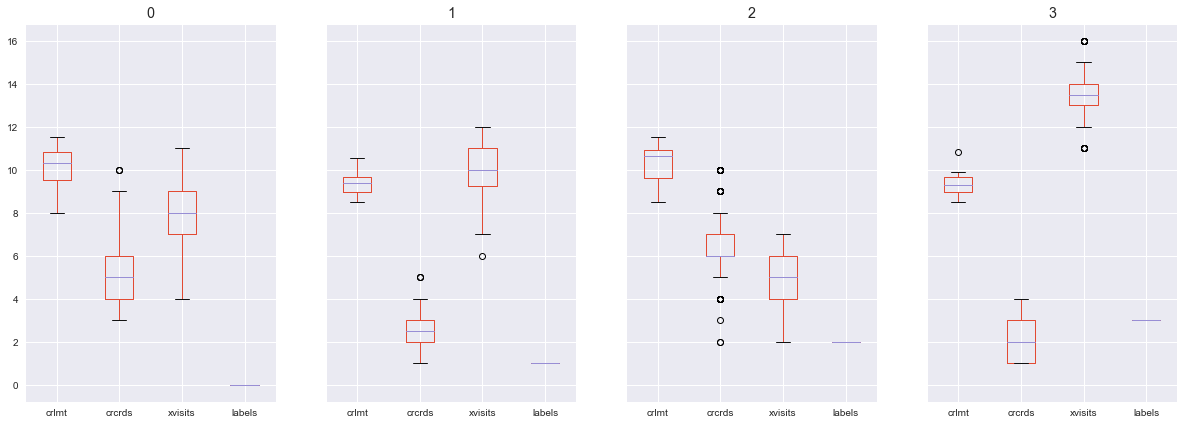

In [56]:
# Plot Box plots for all 4 HC clusters: 

cdf_combo.join(custDataAttr.labels).groupby(['labels']).boxplot(layout=(1,4), figsize=(20, 7)) 
plt.show();

⬆ The boxplots above reconfirms our earlier observations (just above) & detailed Observations & Conclusions (stated in details earlier, much above in kmeans section).

**My Housekeeping: Incremental CODE Backup 6: ⬇**  

In [149]:
### My Housekeeping: Incremental Jupyter File Code Backup 6 ⬆  
Markdown("### Incremental Jupyter Notebook Code Backup 6 ⬆")  

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 6.ipynb" 

! ls -l Project*.ipynb

### Incremental Jupyter Notebook Code Backup 6 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMC & HCluster ALL Life Bank 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMC & HCluster ALL Life Bank 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMC & HCluster ALL Life Bank 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMC & HCluster ALL Life Bank 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  7809730 Jul 27 02:45 Project 5 USL KMC & HCluster ALL Life Bank 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8044341 Jul 29 08:12 Project 5 USL KMC & HCluster ALL Life Bank 6.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8303727 Jul 29 10:38 Project 5 USL KMC & HCluster ALL Life Bank.ipynb


⬇ Now we will do HC with <u>various linkage methods</u> using <u>Dendrograms & Cophenetic Coefficients</u> and Visualize the Results :  


* HC for linkage = single 
  = Coph.Coeff: 0.19818 
  = Silh.Score: 0.15918

* HC for linkage = complete 
  = Coph.Coeff: 0.67154 
  = Silh.Score: 0.33034

* HC for linkage = average 
  = Coph.Coeff: 0.70331 
  = Silh.Score: 0.2855

* HC for linkage = centroid 
  = Coph.Coeff: 0.69344 
  = Silh.Score: 0.27334

* HC for linkage = ward 
  = Coph.Coeff: 0.69264 
  = Silh.Score: 0.53599

* HC Summary: Cophenetic Coeffs & Silhouette Scores for various HC linkage methods:


0  single  complete  average  centroid  ward
0  Cophenetic Coeff    0.20      0.67     0.70      0.69  0.69
1  Silhouette Score    0.16      0.33     0.29      0.27  0.54

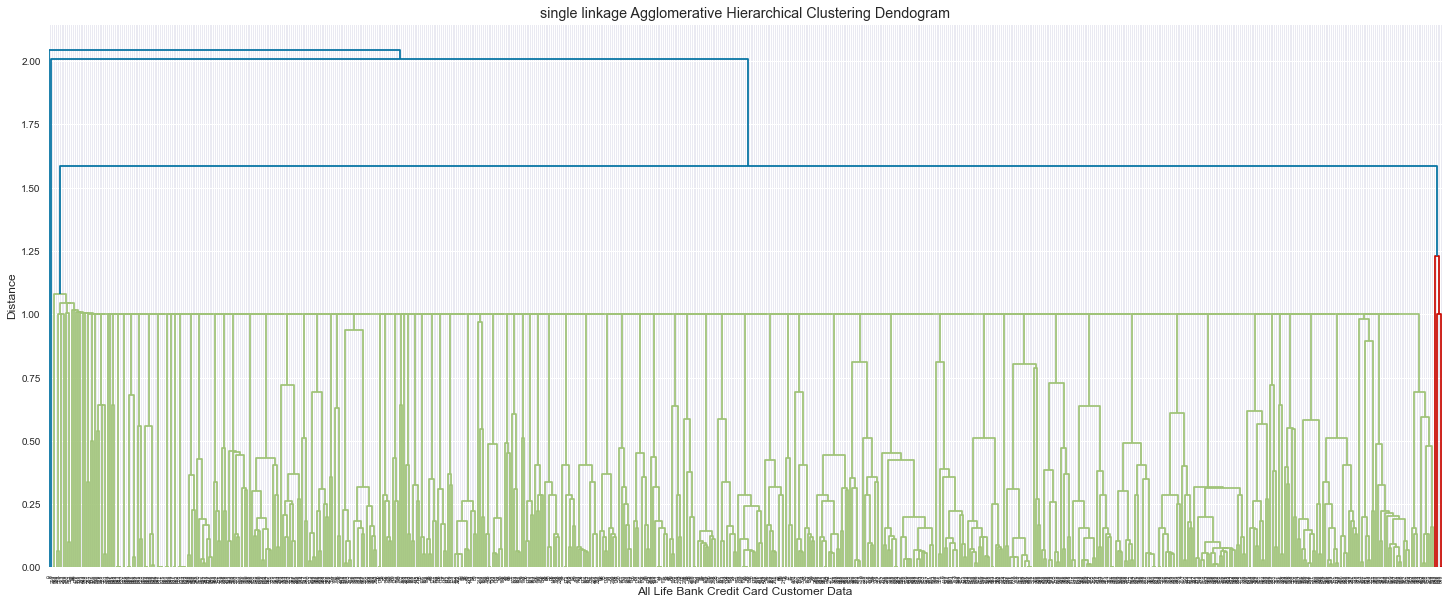

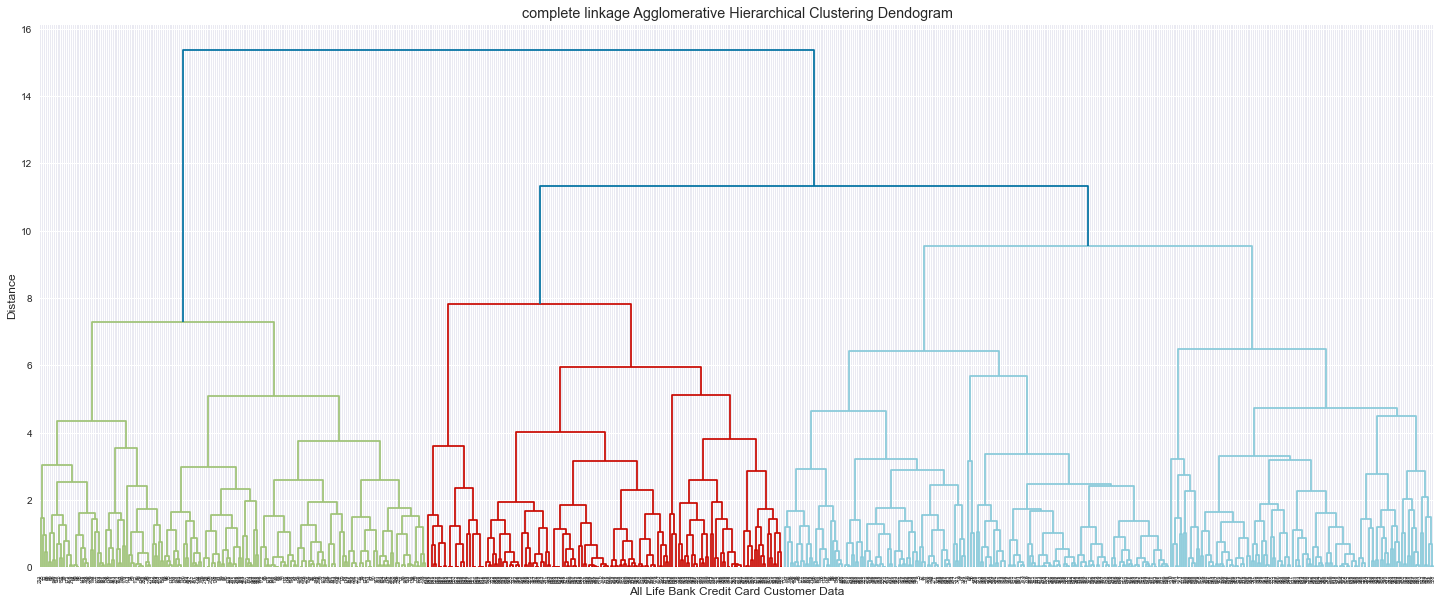

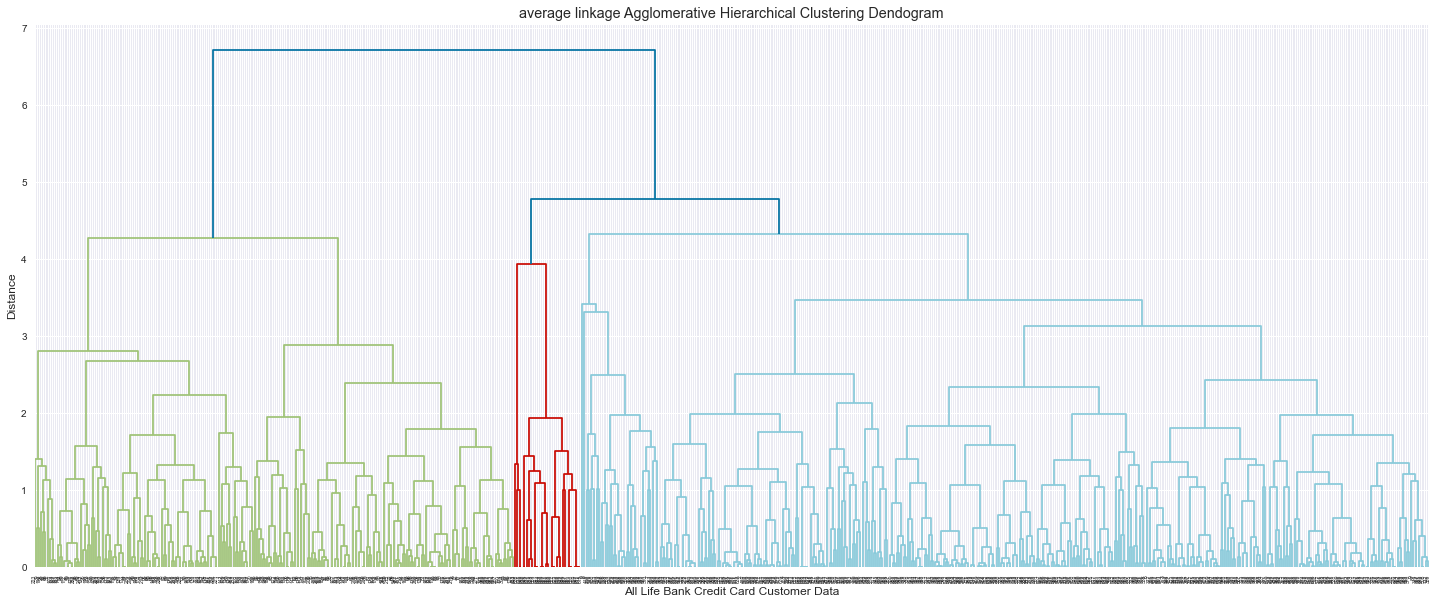

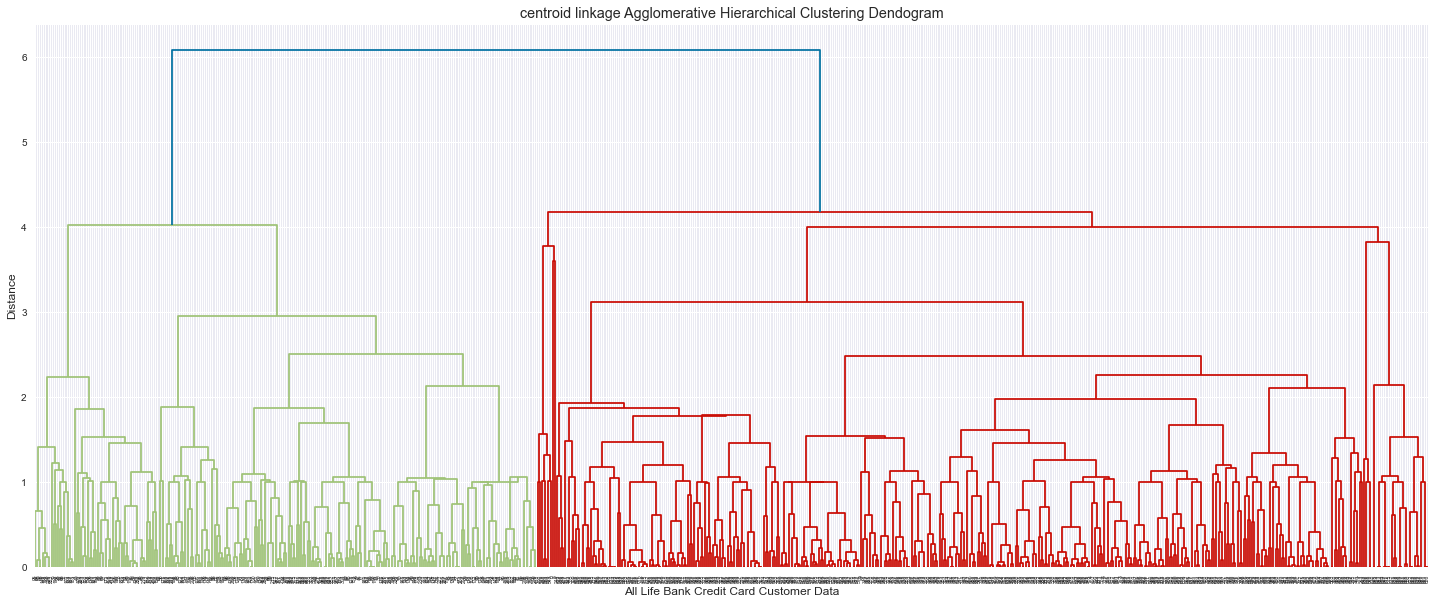

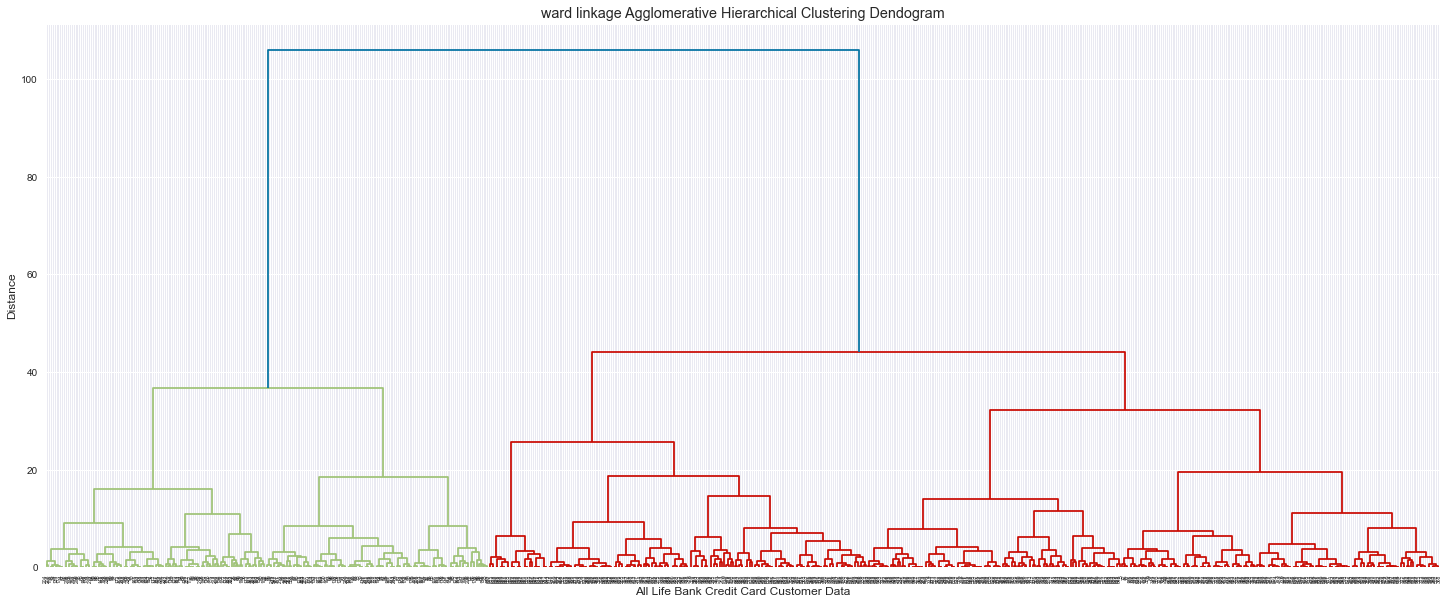

In [272]:
# Run HC Clustering, Plot Dendogram, Compute Cophenetic Coeff & Silhouette Scores... 
# ...for various types of linkages: 'single', 'complete', 'average', 'centroid', 'ward' : 

max_d = 2  # Using Default value for fcluster(...'depth'...)

lnkTyp = ['single', 'complete', 'average', 'centroid', 'ward']  # linkage methods to be used

HC_CopSil_rslt = pd.DataFrame(['Cophenetic Coeff', 'Silhouette Score'])  # Results df for Cop.Coeffs & Sil.Scores for various linkages: 

# function to plot dendogram to be called from inside the loop: 
def dendo(Z, lnk): 
    plt.figure(figsize=(25, 10))
    plt.title(lnk + ' linkage Agglomerative Hierarchical Clustering Dendogram')
    plt.xlabel('All Life Bank Credit Card Customer Data')
    plt.ylabel('Distance')
    
    dendrogram(Z)


# Loop to plot dendogram for each type of linkages in list 'lnkTyp': 
for lnk in lnkTyp:
    
    Z = linkage(cdf_combo, metric='euclidean', method=lnk)
    c, coph_dists = cophenet(Z , pdist(cdf_combo))

    clusters = fcluster(Z, max_d, criterion='distance')
    # clusters
    s = silhouette_score(cdf_combo, clusters)

    HC_CopSil_rslt[lnk] = [c, s]
            
    print('\n* HC for linkage =', lnk, '\n  = Coph.Coeff:', round(c, 5), '\n  = Silh.Score:', round(s, 5))

    dendo(Z, lnk)

print('\n* HC Summary: Cophenetic Coeffs & Silhouette Scores for various HC linkage methods:')
HC_CopSil_rslt


In [274]:
# Display HC results df for both computed metrics: Coph.Coeffs & Silh.Scores for all Linkage Methods used: 
HC_CopSil_rslt


0  single  complete  average  centroid  ward
0  Cophenetic Coeff    0.20      0.67     0.70      0.69  0.69
1  Silhouette Score    0.16      0.33     0.29      0.27  0.54

⬆ From the above table: linkage = "ward" method seems BEST for both Coph.Coeff & Silh.Score (values closer to "+1" forms Best Clusters.  
⬇ We will proceed to further steps with the selected dendogram that is produced by using the "ward" linkage method: 

In [275]:
# Backup / Save HC Z, HC Clusters just created by HC 'ward' linkage just in case we need them, so we dont have to run the process again: 
# The last / most recent dendogram was for "ward". So "Z" and "Cluster" will have HC values from "ward" method: Save them: 

Z_HCward_save = Z
print('\n* HC: Final HC Z Values for linkage = "ward" :')
Z_HCward_save

clusters_HCward_save = clusters
print('\n* HC: Final HC Clusters for linkage = "ward" :')
clusters_HCward_save



* HC: Final HC Z Values for linkage = "ward" :


array([[ 359.        ,  384.        ,    0.        ,    2.        ],
       [ 293.        ,  363.        ,    0.        ,    2.        ],
       [ 619.        ,  624.        ,    0.        ,    2.        ],
       ...,
       [1310.        , 1311.        ,   36.8097315 ,  210.        ],
       [1314.        , 1315.        ,   44.08051782,  450.        ],
       [1316.        , 1317.        ,  105.99755479,  660.        ]])


* HC: Final HC Clusters for linkage = "ward" :


array([49, 11, 65, 88, 63, 77, 88, 47, 45, 79, 18, 77, 13,  3,  1,  1, 28,
       28, 24,  9, 20, 23, 16, 30,  1, 13, 10,  5, 23, 16, 22, 20, 12,  2,
        9, 27, 14, 23,  9, 14, 15, 25, 80, 27, 16,  9, 30, 25, 18, 22,  4,
       24,  5, 10,  7, 30, 29,  1,  2,  9,  8,  6, 29, 22,  4, 26, 26, 18,
       13,  3,  6, 21, 77, 22,  7, 21,  3, 77,  5, 25,  5, 21, 30, 21, 21,
       25, 16, 79,  6,  9, 24,  6,  2,  4, 23,  4, 21, 26,  4, 24,  2, 12,
       15, 25,  7,  5, 24, 23, 22,  8, 19,  7,  9, 84, 80,  1, 26, 16, 22,
       11,  8, 14, 27,  6,  1, 24,  9, 10, 18, 21, 20, 28, 79, 14,  8, 21,
       22,  7, 12,  6, 22, 26,  8, 23,  9, 78,  7,  7,  4, 23, 11, 26, 22,
       18, 15, 25, 10, 12, 15, 30,  6, 20, 28, 14,  8,  6, 16, 16,  4, 20,
       24,  1, 24,  5, 19, 29, 26, 20,  3, 26, 30, 20, 22, 12, 96, 78, 25,
        7, 27, 22, 10, 23, 78, 14, 27,  7, 23, 25,  3, 15, 21,  2,  2, 23,
        1, 25, 28, 19,  1,  2, 16, 22, 78,  3,  9, 16, 22, 84, 11,  5,  6,
        7,  9, 13, 15, 79

⬇ Truncate the selected dendogram ('ward') at various cluster levels and visualize, so that we can select the best Number and Type of Clusters that are formed:  

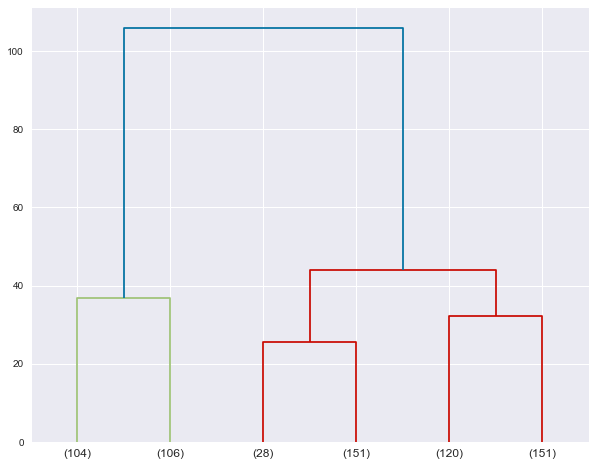

In [276]:
# "Z" already have HC values from the desired / selected method "ward". So we will use "Z" directly here: 
# Use truncate_mode='lastp' in dendrogram() to arrive at a final pruned workable dendrogram with required Clusters: 

# Try selecting 6 Cluster ('p' value) and select the Clsuters that were merged last (truncate_mode='lastp'): 
dendrogram(Z, truncate_mode='lastp', p=6);  # Show only the last p merged clusters


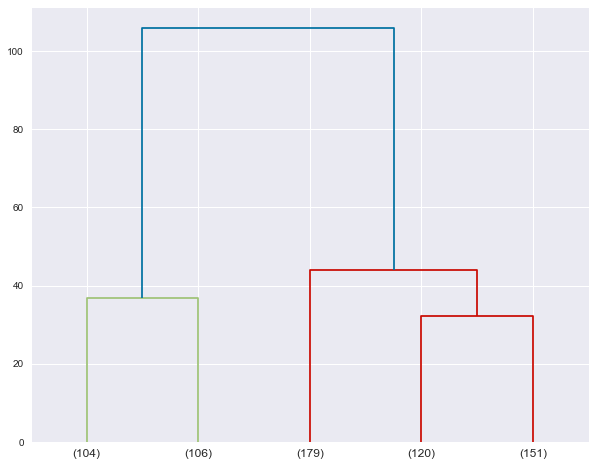

In [277]:
# "Z" already have HC values from the desired / selected method "ward". So we will use "Z" directly here: 
# Use truncate_mode='lastp' in dendrogram() to arrive at a final pruned workable dendrogram with required Clusters: 

# Try selecting 6 Cluster ('p' value) and select the Clsuters that were merged last (truncate_mode='lastp'): 
dendrogram(Z, truncate_mode='lastp', p=5);  # Show only the last p merged clusters


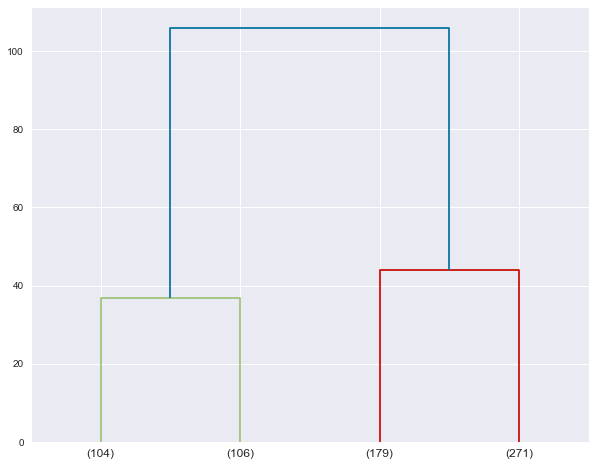

In [278]:
# "Z" already have HC values from the desired / selected method "ward". So we will use "Z" directly here: 
# Use truncate_mode='lastp' in dendrogram() to arrive at a final pruned workable dendrogram with required Clusters: 

# Try selecting 6 Cluster ('p' value) and select the Clsuters that were merged last (truncate_mode='lastp'): 
dendrogram(Z, truncate_mode='lastp', p=4);  # Show only the last p merged clusters


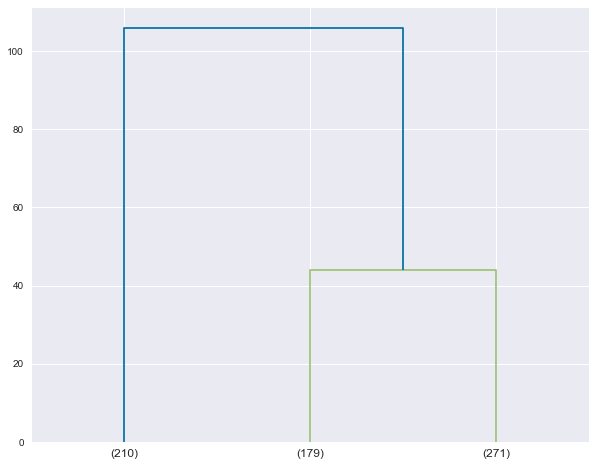

In [279]:
# "Z" already have HC values from the desired / selected method "ward". So we will use "Z" directly here: 
# Use truncate_mode='lastp' in dendrogram() to arrive at a final pruned workable dendrogram with required Clusters: 

# Try selecting 6 Cluster ('p' value) and select the Clsuters that were merged last (truncate_mode='lastp'): 
dendrogram(Z, truncate_mode='lastp', p=3);  # Show only the last p merged clusters


**⬆ Dengogram with p=5 truncation has the BEST Data Distribution among the Clusters, Followed by p=4**
* Number of Clusters = 5 (p=5) : Within Cluster Data item counts: 104, 106, 179, 120, 151
* Number of Clusters = 4 (p=4) : Within Cluster Data item counts: 104, 106, 179, 271
* For p=3 & p=6 the clusters and distributions are not as good

### D3. Completed & Delivered: Execute Hierarchical Clustering : Ends Here: ⬆  
  * Execute with Different Linkages with the help of Dendrogram and Cophenetic Coefficient  (Display Coph Coeff)
  * Analyse Clusters formed using BoxPlot  ...


**My Housekeeping: Incremental CODE Backup 7: ⬇**  

In [151]:
### My Housekeeping: Incremental Jupyter File Code Backup 7 ⬆  
Markdown("### Incremental Jupyter Notebook Code Backup 7 ⬆")  

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 7.ipynb" 

! ls -l Project*.ipynb 

### Incremental Jupyter Notebook Code Backup 7 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMC & HCluster ALL Life Bank 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMC & HCluster ALL Life Bank 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMC & HCluster ALL Life Bank 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMC & HCluster ALL Life Bank 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  7809730 Jul 27 02:45 Project 5 USL KMC & HCluster ALL Life Bank 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8044341 Jul 29 08:12 Project 5 USL KMC & HCluster ALL Life Bank 6.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8303804 Jul 29 10:43 Project 5 USL KMC & HCluster ALL Life Bank 7.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8303804 Jul 29 10:43 Project 5 USL KMC & HCluster ALL Life Bank.ipynb


### D4. Calculate Average Silhouette Score for Both Methods: Starts Here: ⬇  
* Calculate Silhouette Scores for both KMeans & Hierarchial Clusters. Also: Compute Average Silhouette Score for:  
  * Clusters formed by Kmeans: n_clusters = (2...15)  
  * Linkage Methods for Hierarchial Clusters: linkage = (single, complete, average, centroid, ward)  


In [597]:
# Calculate Silhouette Scores for KMeans Clusters and save results in a df: 

kmc_silh_score_df = []

print('\n⬇ Silhouette Score for Kmeans Clusters by Number Of Clusters (n_clusters) :\n') 
for n_clusters_kmc in range(2,15):
    clusters_kmc = KMeans(n_clusters=n_clusters_kmc, n_init=5, random_state=6)
    preds_kmc = clusters_kmc.fit_predict(cdf_combo)
    centers_kmc = clusters_kmc.cluster_centers_
    kmc_silh_score = silhouette_score(cdf_combo, preds_kmc)
    kmc_silh_score_df.append([n_clusters_kmc, kmc_silh_score])

    print('   * KMeans n_clusters = ', n_clusters_kmc, 'Silhouette Score: ', kmc_silh_score)

kmc_silh_score_df = pd.DataFrame(kmc_silh_score_df, columns=(['kmc_n_clusters', 'kmc_silh_score']))
kmc_silh_score_df.set_index('kmc_n_clusters', inplace=True)



⬇ Silhouette Score for Kmeans Clusters by Number Of Clusters (n_clusters) :

   * KMeans n_clusters =  2 Silhouette Score:  0.4842116690870953
   * KMeans n_clusters =  3 Silhouette Score:  0.34448586552590643
   * KMeans n_clusters =  4 Silhouette Score:  0.3406136328724717
   * KMeans n_clusters =  5 Silhouette Score:  0.33239242880952635
   * KMeans n_clusters =  6 Silhouette Score:  0.33102703858948074
   * KMeans n_clusters =  7 Silhouette Score:  0.3184920246854614
   * KMeans n_clusters =  8 Silhouette Score:  0.3331863537423593
   * KMeans n_clusters =  9 Silhouette Score:  0.32277815103844176
   * KMeans n_clusters =  10 Silhouette Score:  0.330322479836816
   * KMeans n_clusters =  11 Silhouette Score:  0.32039137842123844
   * KMeans n_clusters =  12 Silhouette Score:  0.3168615154648269
   * KMeans n_clusters =  13 Silhouette Score:  0.31337179109083607
   * KMeans n_clusters =  14 Silhouette Score:  0.31807068134877964


In [598]:
# Format & Display Silhouette Scores for KMeans Clusters & Hierarchial Clusters from their respective results df : 
# Also: Compute & Display the AVERAGE mean() Silhouette Scores for All Clusters (KMC) & All Linkage Methods (HC): 

pd.options.display.float_format = '{:,.6f}'.format

print('\n⬇ Silhouette Scores for KMeans by Number of Clusters: ( ⮕ Average Silh. Score For All Clusters:', 
      round(kmc_silh_score_df.mean()[0],6), '⬅ )' )

kmc_silh_score_df.T

print('\n⬇ Silhouette Scores for Hierarchial Clusters by Linkage Method: ( ⮕ Average Silh. Score For All Methods:', 
      round(HC_CopSil_rslt.T.iloc[1:, 1:].mean()[1],6), '⬅ )' )

# Display from previously calculated and saved HC Silh. Scores from this df: Filter out 1st df row for Coph. Coeff by using df[1:] ): 
HC_CopSil_rslt[1:]

pd.options.display.float_format = '{:,.2f}'.format


⬇ Silhouette Scores for KMeans by Number of Clusters: ( ⮕ Average Silh. Score For All Clusters: 0.338939 ⬅ )


kmc_n_clusters       2        3        4        5        6        7        8   \
kmc_silh_score 0.484212 0.344486 0.340614 0.332392 0.331027 0.318492 0.333186   

kmc_n_clusters       9        10       11       12       13       14  
kmc_silh_score 0.322778 0.330322 0.320391 0.316862 0.313372 0.318071


⬇ Silhouette Scores for Hierarchial Clusters by Linkage Method: ( ⮕ Average Silh. Score For All Methods: 0.316871 ⬅ )


0   single  complete  average  centroid     ward
1  Silhouette Score 0.159180  0.330341 0.285500  0.273341 0.535992

### D4. Completed & Delivered: Calculate Average Silhouette Score for Both Methods: Ends Here: ⬆  
Calculated Silhouette Scores as exhibited above for:  
* KMeans n_clusters = 2...15 : Results tabulated above  
  ⮕ Also derived the AVERAGE Silh. Score = 0.338939 which is mean() of all these kmeans silh. scores  
  
* Hierarchial linkage = (single, complete, average, centroid, ward)  
  ⮕ Also derived the AVERAGE Silh. Score = 0.316871 which is mean() of all these Hierarchial silh. scores  
  
**<u>Conclusion</u>: The AVERAGEed Silhouette Scores for KMeans & Hierarchial are not SAME, but they are CLOSE & SIMILAR to each other**  

**My Housekeeping: Incremental CODE Backup 8: ⬇**  

In [422]:
### My Housekeeping: Incremental Jupyter File Code Backup 8 ⬆  
Markdown("### Incremental Jupyter Notebook Code Backup 8 ⬆")  

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 8.ipynb" 

! ls -l Project*.ipynb 

### Incremental Jupyter Notebook Code Backup 8 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMC & HCluster ALL Life Bank 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMC & HCluster ALL Life Bank 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMC & HCluster ALL Life Bank 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMC & HCluster ALL Life Bank 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  7809730 Jul 27 02:45 Project 5 USL KMC & HCluster ALL Life Bank 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8044341 Jul 29 08:12 Project 5 USL KMC & HCluster ALL Life Bank 6.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8303804 Jul 29 10:43 Project 5 USL KMC & HCluster ALL Life Bank 7.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8314909 Jul 31 04:21 Project 5 USL KMC & HCluster ALL Life Bank 8.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8314909 Jul 31 04:21 Project 5 USL KMC & HCluster ALL Life Bank.ipynb


### D5. Compare K Means Clusters with Hierarchical Clusters : Starts Here: ⬇  

In [450]:
# Apply HC Labels to cdf_combo (our working dataset df) from the already HC labeled custDataAttr df: 
# This is create a a HC labeled from cdf_combo for our furthing workings / study / analysis: 

custDataAttr.head()
cdf_combo.head()
cdf_combo_HC_lbl = cdf_combo.join(custDataAttr.labels)
cdf_combo_HC_lbl.head()


Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  labels  
0                  1                    1                 0       2  
1                  0                   10                 9       3  
2                  1                    3                 4       0  
3                  1                    1                 4       0  
4                  0                   12                 3       0

crlmt   crcrds   xvisits
0 11.512925 2.000000  2.000000
1 10.819778 3.000000 13.000000
2 10.819778 7.000000  8.000000
3 10.308953 5.000000  6.000000
4 11.512925 6.000000  7.000000

crlmt   crcrds   xvisits  labels
0 11.512925 2.000000  2.000000       2
1 10.819778 3.000000 13.000000       3
2 10.819778 7.000000  8.000000       0
3 10.308953 5.000000  6.000000       0
4 11.512925 6.000000  7.000000       0

In [765]:
# Display All 5 Features for each of the 4 Clusters formed by KMeans & Hierarchial Methods: 
# NOTE: Omitted Customer IDs columns like 'Sl_No', 'Customer Key' are not Displayed here as they are NOT relevant for this study: 

print('\n⬇ Customer Features: mean() values by Clusters: Grouped by KMeans Cluster Numbers: "group" : ')
cdf_kmGrp_labeled.iloc[:, 2:].groupby(["group"]).mean()  # Skip first 2 cols ('Sl_No', Customer Key) for summary using mean() 

print('\n⬇ Customer Features: mean() values by Clusters: Grouped by Hierarchial Cluster Numbers: "labels" : ')
custDataAttr.iloc[:, 2:].groupby(["labels"]).mean()  # Skip first 2 cols ('Sl_No', Customer Key) for summary using mean() 



⬇ Customer Features: mean() values by Clusters: Grouped by KMeans Cluster Numbers: "group" : 


Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
group                                                            
0             12,183.67                2.32               1.07   
1             38,565.22                5.38               2.86   
2             62,475.31                7.21               2.94   
3             22,820.36                3.63               2.54   

       Total_visits_online  Total_calls_made  
group                                         
0                     3.90              7.79  
1                     1.00              1.08  
2                     3.90              2.30  
3                     1.98              3.89


⬇ Customer Features: mean() values by Clusters: Grouped by Hierarchial Cluster Numbers: "labels" : 


Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0              38,114.39                5.25               3.38   
1              12,443.40                2.55               1.11   
2              55,318.44                6.61               2.47   
3              12,201.92                2.19               1.06   

        Total_visits_online  Total_calls_made  
labels                                         
0                      1.69              2.58  
1                      3.21              5.57  
2                      2.80              1.12  
3                      4.03              8.43

⬆ Compare each Feature within each Cluster WITH the same Feature IN both KMeans & Hierarchical Clusters ⬆  
⬇ Tabulate the Findings:  

##### <center><u>Cluster Similarity Comparision Chart : KMeans Clusters & Hierarchial Clusters</u> :</center>  

| KMC:⬇ / HC:⮕ | H.Cluster 0 | H.Cluster 1 | H.Cluster 2 | H.Cluster 3 | Comments                                        |
|:-------------|:-----------:|:-----------:|:-----------:|:-----------:|:-------------------------------------------------|
| KM.Cluster 0 |             |  Similar ?  |             |  SIMILAR ✓  | HC 1 **≈** "Similar?" to KMC 0 & to its own HC 3 |
| KM.Cluster 1 |  SIMILAR ✓  |             |             |             | Cluster's Individual Feature values are similar  |
| KM.Cluster 2 |             |             |  SIMILAR ✓  |             | Cluster's Individual Feature values are similar  |
| KM.Cluster 3 | Distinct ✘  |  Distinct ✘ |  Distinct ✘ |  Distinct ✘ | KMC 3 doesn't seem "Similar" to any H.Cluster    |


### D5. Completed & Delivered: Compare K Means Clusters with Hierarchical Clusters : Ends Here: ⬆  
* **<u>Conclusion</u> : Tabulated in the Cluster Comparision Chart above ⬆**  

**My Housekeeping: Incremental CODE Backup 9: ⬇**  

In [767]:
### My Housekeeping: Incremental Jupyter File Code Backup 9 ⬆  
Markdown("### Incremental Jupyter Notebook Code Backup 9 ⬆")  

! cp "Project 5 USL KMC & HCluster ALL Life Bank.ipynb" \
     "Project 5 USL KMC & HCluster ALL Life Bank 9.ipynb" 

! ls -l Project*.ipynb 

### Incremental Jupyter Notebook Code Backup 9 ⬆

-rw-r--r--  1 RiddhiSiddhi  staff    47535 Jul 18 07:08 Project 5 USL KMC & HCluster ALL Life Bank 1.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6036136 Jul 20 04:14 Project 5 USL KMC & HCluster ALL Life Bank 2.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6086399 Jul 23 00:47 Project 5 USL KMC & HCluster ALL Life Bank 3.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  6830321 Jul 23 03:42 Project 5 USL KMC & HCluster ALL Life Bank 4.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  7809730 Jul 27 02:45 Project 5 USL KMC & HCluster ALL Life Bank 5.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8044341 Jul 29 08:12 Project 5 USL KMC & HCluster ALL Life Bank 6.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8303804 Jul 29 10:43 Project 5 USL KMC & HCluster ALL Life Bank 7.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8314909 Jul 31 04:21 Project 5 USL KMC & HCluster ALL Life Bank 8.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  8884084 Jul 31 21:16 Project 5 USL KMC & HCluster ALL Life Bank 9.ipynb
-rw-r--r--  1 RiddhiSiddhi  staff  88

### D6. Analysis the Clusters formed : Starts Here : ⬇  

  * Differentiate Clusters from another
  * Answer all the key questions

**Key Questions & Answers:**  

  * Different Customers Segments: TBD, WIP...  
  * Segment Differences from each other: TBD, WIP...  
  * Recommendations to Bank for Better Market & Service these Customers: TBD, WIP...  



**⬇ Analyze & Visualize Clusters in KMC .OR. in KC to Differentiate them from another:  
⬇ Select KMC or HC Clusters based on their respective Silhouette Scores:**  

In [798]:
# Select KMC or HC Clusters based on their Silhouette Scores: 

# Exhibit 1: Display All previously derived & saved Silhouette Scores For KMeans & Hierarchical Clusters:

pd.options.display.float_format = '{:,.6f}'.format

print('\n⬇ Silhouette Scores for KMeans by Number of Clusters:')
kmc_silh_score_df.T

print('\n⬇ Silhouette Scores for Hierarchial Clusters by Linkage Method:')
HC_CopSil_rslt[1:]

pd.options.display.float_format = '{:,.2f}'.format


⬇ Silhouette Scores for KMeans by Number of Clusters:


kmc_n_clusters       2        3        4        5        6        7        8   \
kmc_silh_score 0.484212 0.344486 0.340614 0.332392 0.331027 0.318492 0.333186   

kmc_n_clusters       9        10       11       12       13       14  
kmc_silh_score 0.322778 0.330322 0.320391 0.316862 0.313372 0.318071


⬇ Silhouette Scores for Hierarchial Clusters by Linkage Method:


0   single  complete  average  centroid     ward
1  Silhouette Score 0.159180  0.330341 0.285500  0.273341 0.535992

⬆ From Exhibit 1 above, the Highest Silhouette Score for KMC is 0.48 (for 2 Clusters) and for HC its is 0.53 (for 4 Clusters).  
  * The Silh Score goes from -1 to +1 and its considered BEST when it is Closest to +1.  
  * Hence, the BEST Silhouette Scores among KMC & HC, is <u>**0.535992**</u> for HC ("Hierarchial Clustering") method for linkage type "ward".  
  * Therefore, we will CHOOSE Clusters formed by "<u>Hierarchial Clustering</u>" method to answer the Key Question as required by this Deliverable:  

In [799]:
# Visualize and Analyze all Clusters to Differentiate Clusters from another: 
# Show Clusters with all its Features HC (finalized method) for a side by side Differentiation 

print('\n* Hierarchial Clusters labeled by index col "labels" : ')
cdf_combo_HC_lbl.groupby(["labels"]).mean().T



* Hierarchial Clusters labeled by index col "labels" : 


labels      0    1     2     3
crlmt   10.15 9.34 10.29  9.31
crcrds   5.25 2.55  6.61  2.19
xvisits  7.55 9.89  4.88 13.46

    ⬇ H e i r a r c h i a l   C l u s t e r s :   ( " l a b e l s " )


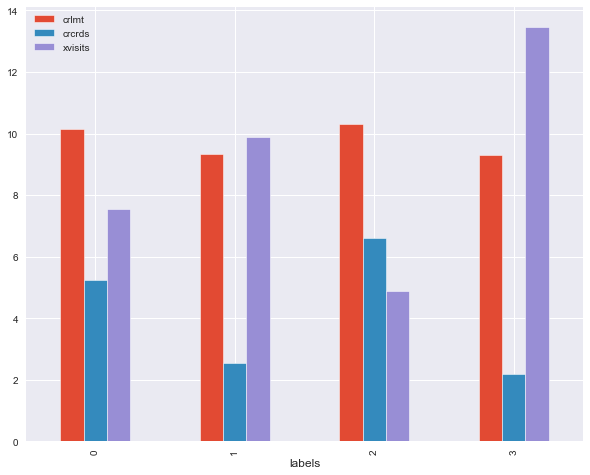

In [821]:
# Visual 1: Bar Plot for above grouped data for visual Cluster Differentiation Side by Side: 
# Bar Plots for HC Clusters from above data df with the Cluster Features: Grouped by cluster number labels 'labels' : 

print(* '  ⬇Heirarchial Clusters: ("labels")')

cdf_combo_HC_lbl.groupby(["labels"]).mean().plot(kind="bar");


  ⬇ H e i r a r c h i a l   C l u s t e r s : ( " l a b e l s " )


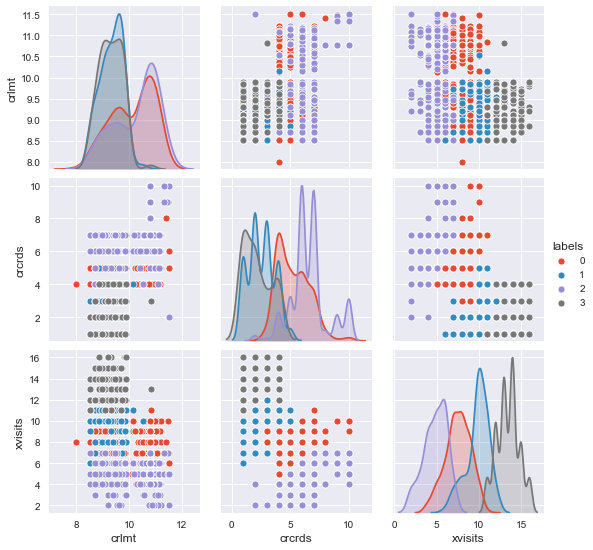

In [823]:
# Visual 2: For above grouped data for visual Cluster Differentiation Side by Side: 

# Visual 2: Pair Plot for above grouped data for visual Cluster Differentiation Side by Side: 
# Pair Plots for HC Clusters from above data df with the Cluster Features: Grouped by cluster number labels 'labels' : 

print(* ' ⬇Heirarchial Clusters:("labels")')

sns.pairplot(cdf_combo_HC_lbl, hue='labels');
plt.show();


In [824]:
# Exhibit 2: Display HC Clusters with its Original Attributes: 

print('\n⬇ Customer Features: mean() values by Clusters: Grouped by Hierarchial Cluster Numbers: "labels" : ')
custDataAttr.iloc[:, 2:].groupby(["labels"]).mean()  # Skip first 2 cols ('Sl_No', Customer Key) for summary using mean() 



⬇ Customer Features: mean() values by Clusters: Grouped by Hierarchial Cluster Numbers: "labels" : 


Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0              38,114.39                5.25               3.38   
1              12,443.40                2.55               1.11   
2              55,318.44                6.61               2.47   
3              12,201.92                2.19               1.06   

        Total_visits_online  Total_calls_made  
labels                                         
0                      1.69              2.58  
1                      3.21              5.57  
2                      2.80              1.12  
3                      4.03              8.43

**⬆ From all the above Exhibits (1 & 2) and Visuals (1 & 2), Here are the Answers to the Key Questions:**  

**⬇ Differentiate Clusters from another:**  
* Cluster 2 : Highest Credit Limits, Highest Number of Credit Cards, Least Frequent Bank Contact, Low Maintenance Customers.  
* Cluster 3 & Cluster 1 : Lowest Credit Limits, Lowest Number of Credit Cards, Most Frequent Bank Contact, High Maintenance Customers.  
* Cluster 0 : Customers with Moderate of all features elements : Credit Limits, Credit Cards, Contact with Bank.  

**⬇ Key Questions & Answers:**  
* Q1. How many different segments of customers are there?
  * Answer: There are Four (4) Custoner Segments (Clusters): Cluster Numbers 0, 1, 2, 3. However, for Practical Purposes, Clusters 1 & 3 are somewhat similar and they could be considered as Similar Type and maybe "Merged". This matter will up to the All Life Bank (Business) to decide, in which case there would be Three (3) Distinct Customer Segments.  
* Q2. How are these segments different from each other?
  * Answer:  
  * Cluster 2 : Highest Credit Limits, Highest Number of Credit Cards, Least Frequent Bank Contact, Low Maintenance Customers.  
  * Cluster 3 & Cluster 1 : Lowest Credit Limits, Lowest Number of Credit Cards, Most Frequent Bank Contact, High Maintenance Customers.  
  * Cluster 0 : Customers with Moderate of all features elements : Credit Limits, Credit Cards, Contact with Bank.  


* Q3. What are your recommendations to the bank on how to better market to and service these customers?  
  * Answer:  By each Customer Segment (Seg):  
  * Seg 2 Customers contact the Bank least Often, hence this Seg should be approached by Customer Service with New and Special Products and/or Services so that they contact the Bank more Often which will give Bank an opportunity to engage them in increase business.  
  * Seg 0 Customers can be engaged more proactively to "promote" them to Seg 2 class.  
  * Seg 1 & Seg 3 Customer should be better "educated" on the bank's Products, Services, Means/Methods so that they would somewhat reduce their contact with Bank (Frequent calls, visits, logins) and become a LOW Maintenance Customers. While doing so, the Bank should also encourage them to get more Credit (Credit Limit, Cards, Products, Sercices). Bank should focus and target this Segment to SELL them more Products/Services because of their Highly Frequent Contacts with Bank OPENS more Opportunity for the Bank.  
  * Bank's Customer Service should be more Proactive in engaging their Customers, rather then wait on Customer to contact them. The Segs who contact the Bank MOST are least "Credit Experienced" Customers, who could be further "educated".  
  

### D6. Completed & Delivered: Analysis the Clusters formed : Ends Here : ⬆  

  * Differentiate Clusters from another: DONE ✓ See Above  
  * Answer all the following key questions: DONE ✓ See Above  

**Key Questions & Answers:**  

  * Different Customers Segments: DONE ✓ See Above  
  * Segment Differences from each other: DONE ✓ See Above  
  * Recommendations to Bank for Better Market & Service these Customers: DONE ✓ See Above  
  

### ⬆ Code End ⬆  
# <center> ⬆ End Of Project 5 ⬆ </center>